# Readme

# Setup

In [2]:
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import time
import random
import pickle
import json
import itertools
import importlib
import os
import seaborn as sns
from scipy.interpolate import interp1d

/home/mmip/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import sys
sys.path.append ('functions')

import functions as mf
importlib.reload(mf) 

from rnn_module import AmmoniaRNN

In [4]:
pd.set_option("display.max_columns", None)

# Models

In [5]:
response = ["e.cum", "delta_e.cum", "e.cum and delta_e.cum"]
bidirectional = [True, False]
mlp = [True, False]
with_embeddings = [True, False]
num_params = [None]

hyper_grid = pd.DataFrame(
    itertools.product(response, bidirectional, mlp, with_embeddings, num_params), 
    columns=["response", "bidirectional", "mlp", "with_embeddings", "num_params"]
)

hyper_grid.insert(0, "model", range(1, len(hyper_grid) + 1))

hyper_grid.style.hide(axis="index")

# Choice of hidden size

In [8]:
# Dossier contenant les fichiers
folder_path = "results/selection_of_h/df_res"

# Liste pour stocker les DataFrames
df_list = []

# Parcourir tous les fichiers du dossier
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Adapter selon le format des fichiers
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)  # Adapter selon le format (ex: read_excel pour xlsx)
        df_list.append(df)

# Concaténer tous les DataFrames
df_selection_of_h = pd.concat(df_list, ignore_index=True)

In [9]:
df_selection_of_h.head (2)

model  hidden_size  with_embeddings  min_mae_eval  sample  running_time
0      1           16             True      3.974413       5     12.822527
1      2           16            False      4.890377       5      9.707243

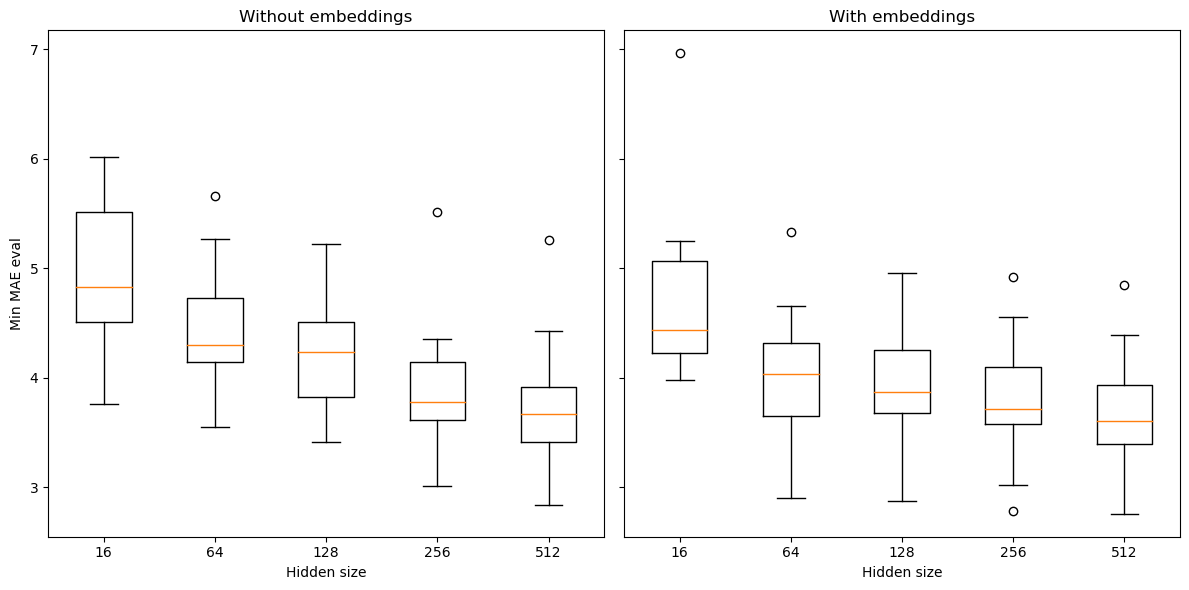

In [10]:
# Création des subplots pour les deux valeurs de 'with_embeddings'
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

title = ["Without embeddings", "With embeddings"]

# Boucle sur les valeurs de with_embeddings (False et True)
for i, emb in enumerate([False, True]):
    # Filtrer les données pour la valeur actuelle de 'with_embeddings'
    df_subset = df_selection_of_h[df_selection_of_h['with_embeddings'] == emb]
    
    # Extraire les valeurs uniques de 'hidden_size' triées
    hidden_sizes = sorted(df_subset['hidden_size'].unique())

    # Préparer les données pour les boxplots (une liste de listes)
    data_to_plot = [df_subset[df_subset['hidden_size'] == h]['min_mae_eval'].values for h in hidden_sizes]

    # Tracer le boxplot
    axes[i].boxplot(data_to_plot, positions=range(len(hidden_sizes)))
    
    # Ajouter les labels et titre
    axes[i].set_xticks(range(len(hidden_sizes)))
    axes[i].set_xticklabels(hidden_sizes)
    axes[i].set_title(title[i])
    axes[i].set_xlabel("Hidden size")

# Ajouter le label commun pour l'axe des y
axes[0].set_ylabel("Min MAE eval")

plt.tight_layout()
plt.show()


# Evaluation curves

Représentation des courbes de loss sur le jeu d'entrainement et sur le jeu d'évaluation pour quelques modèles en fonction des différentes réponses. **On observe que dans la majorité des cas, la perte sur le jeu d'évaluation s'était stabilisé voir recroissait de nouveau.** On aurait pu vouloir un nombre d'époch un peu plus grand, mais c'est acceptable.

## ecum

model                  1
response           e.cum
bidirectional       True
mlp                 True
with_embeddings     True
num_params          None
Name: 0, dtype: object


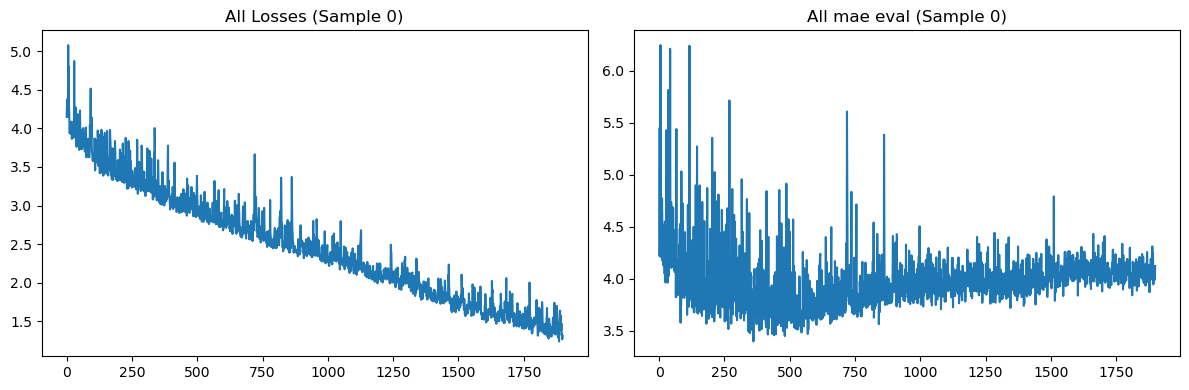

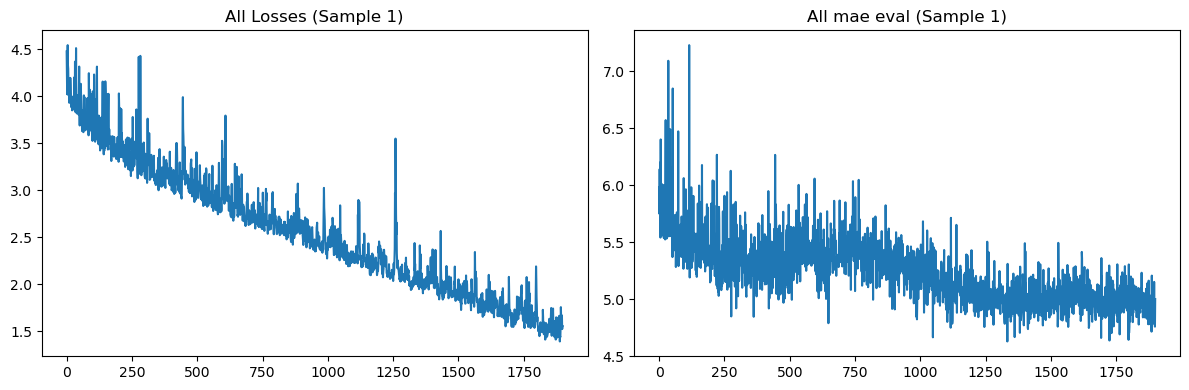

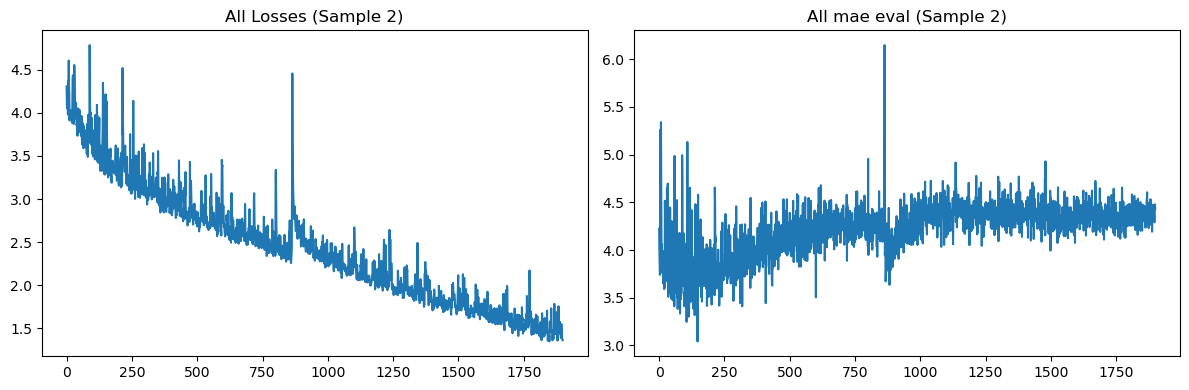

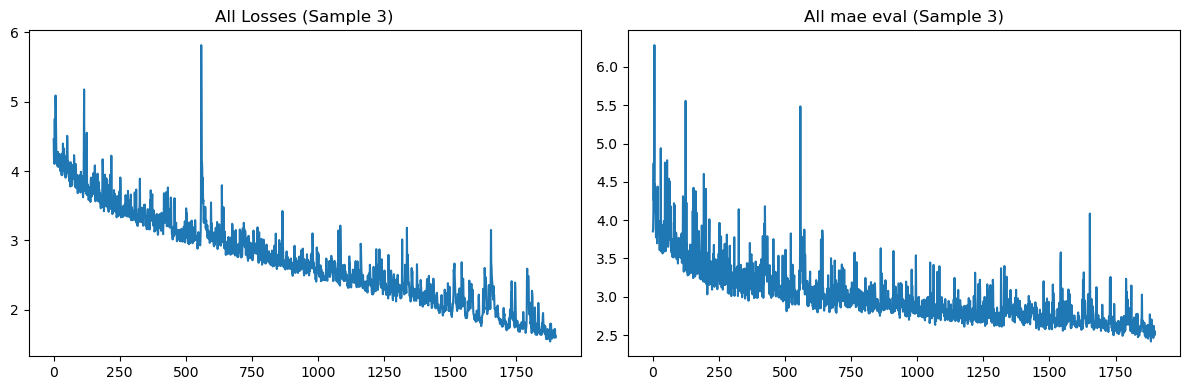

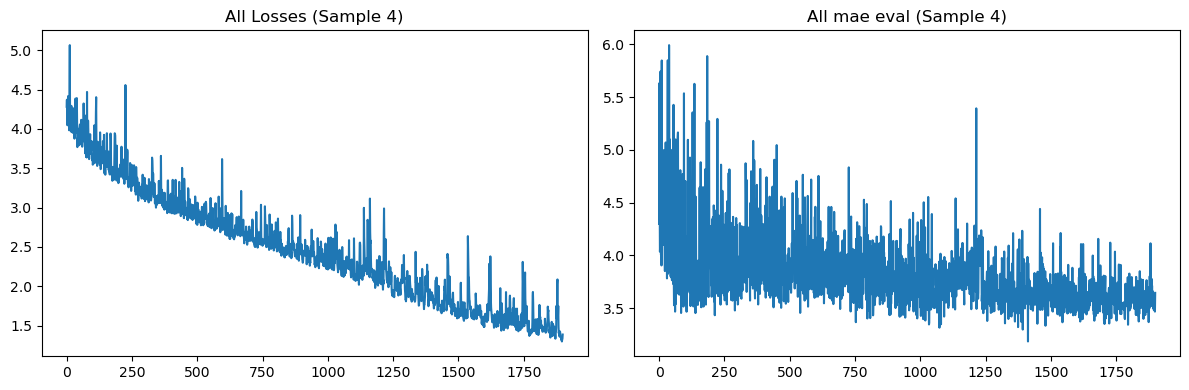

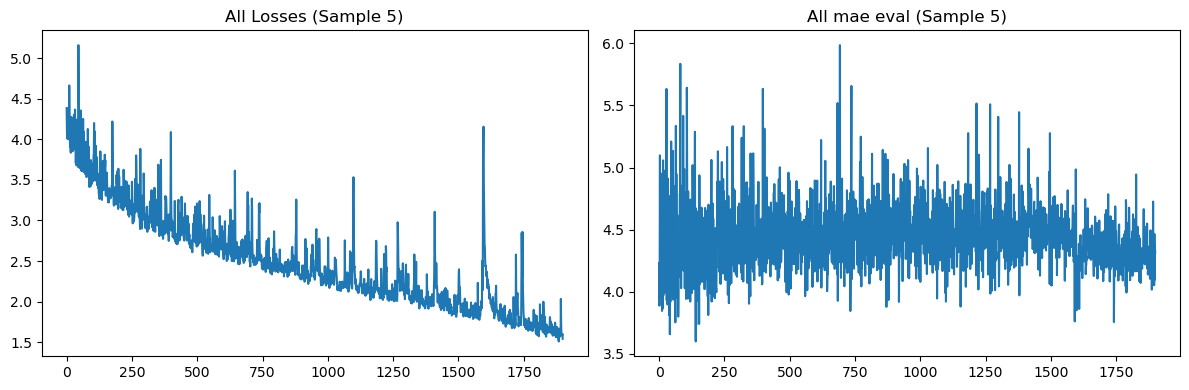

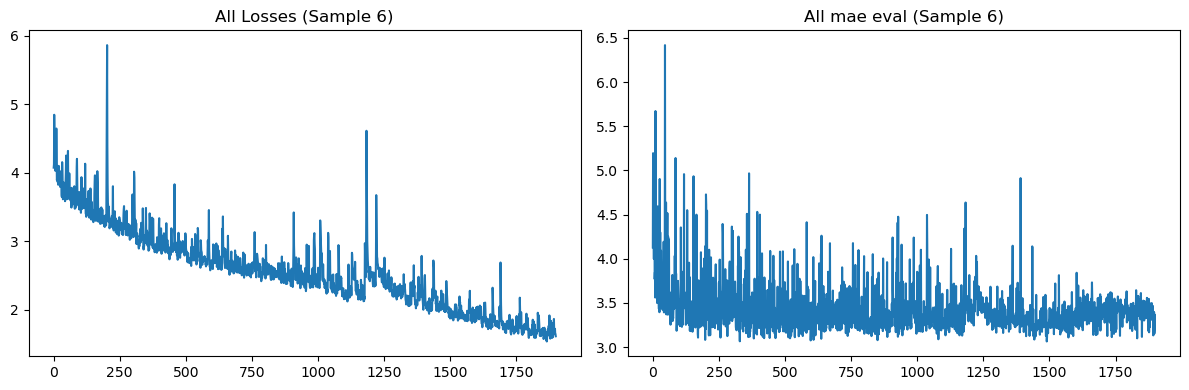

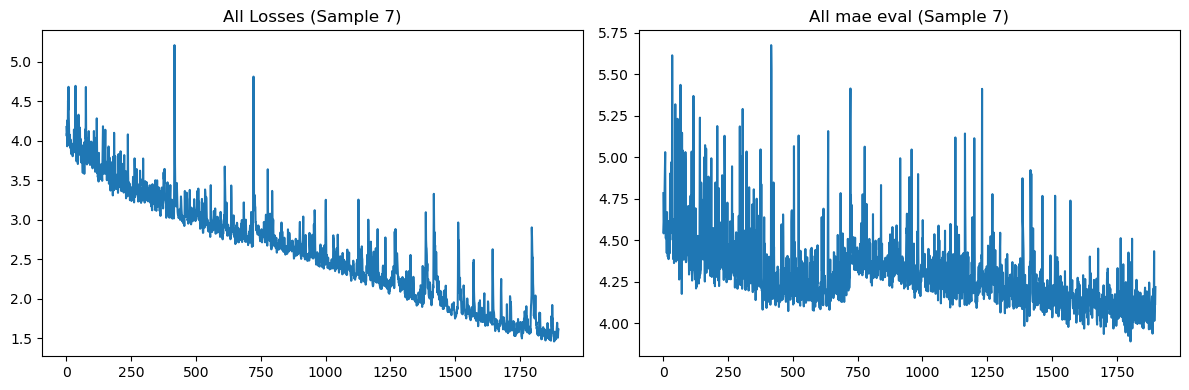

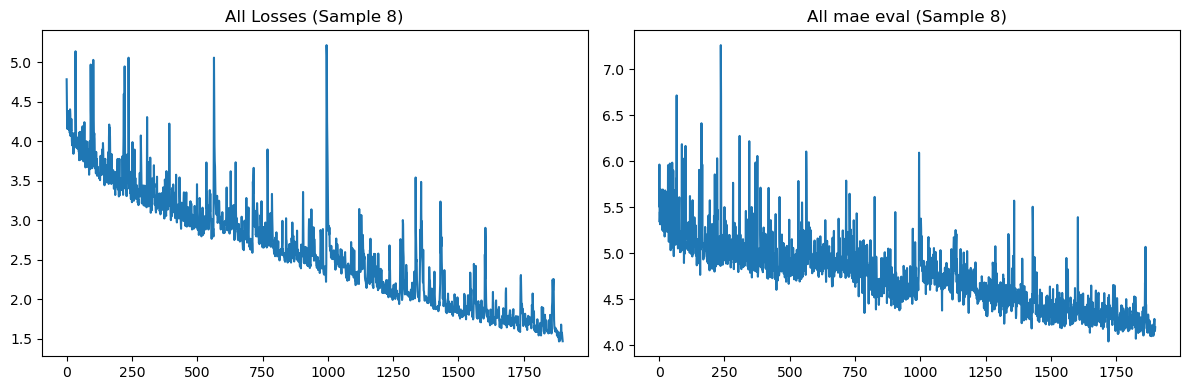

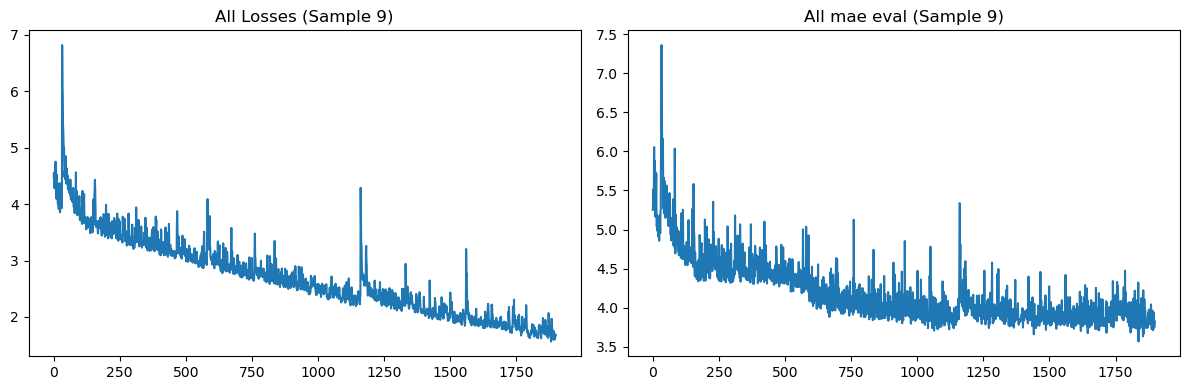

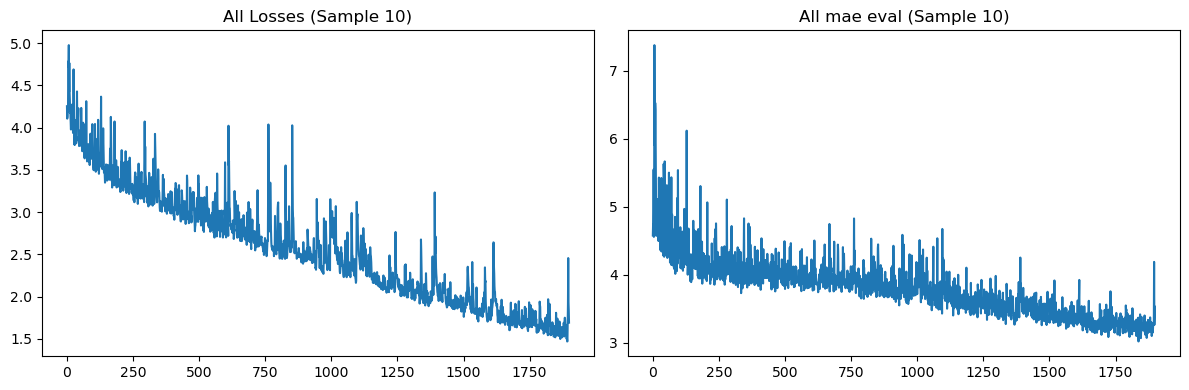

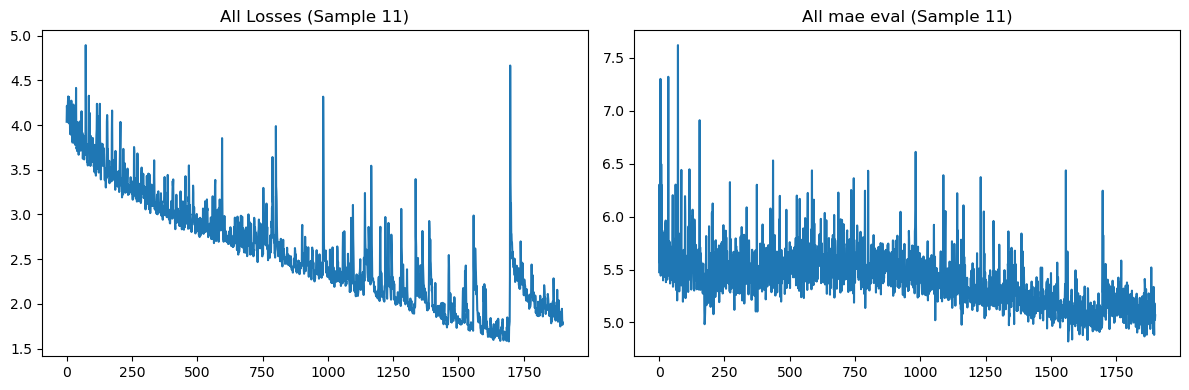

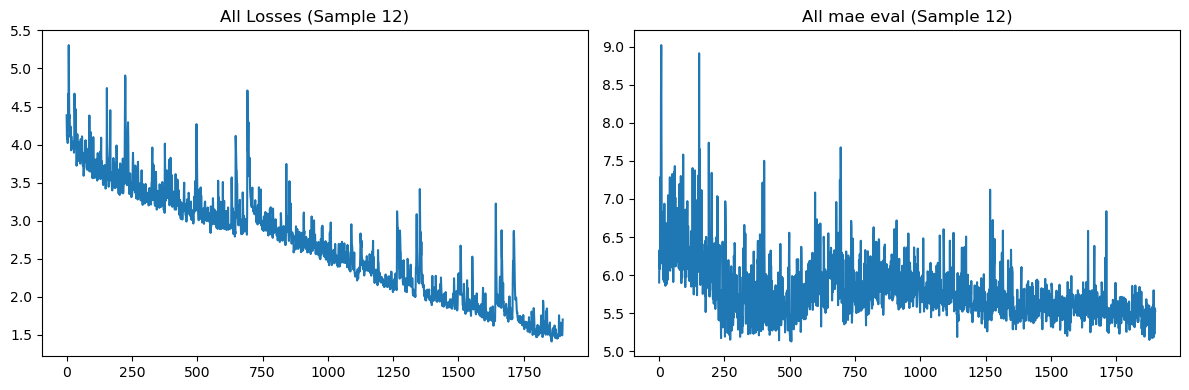

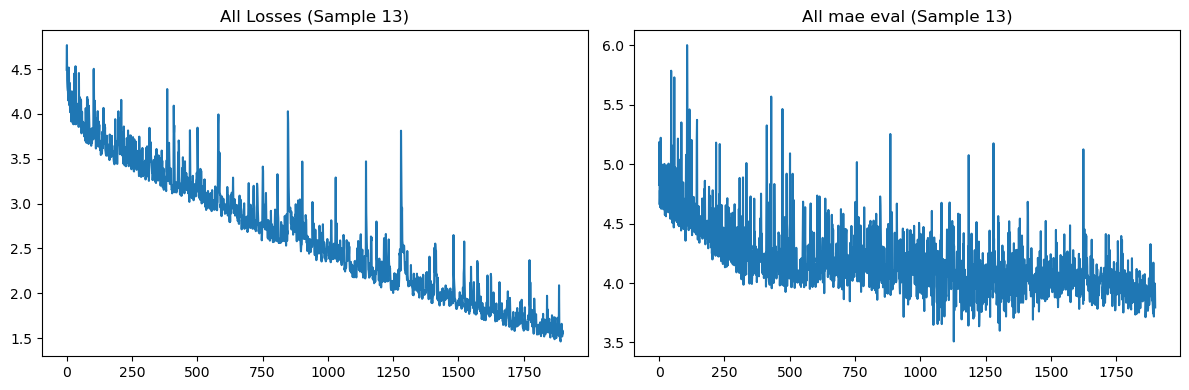

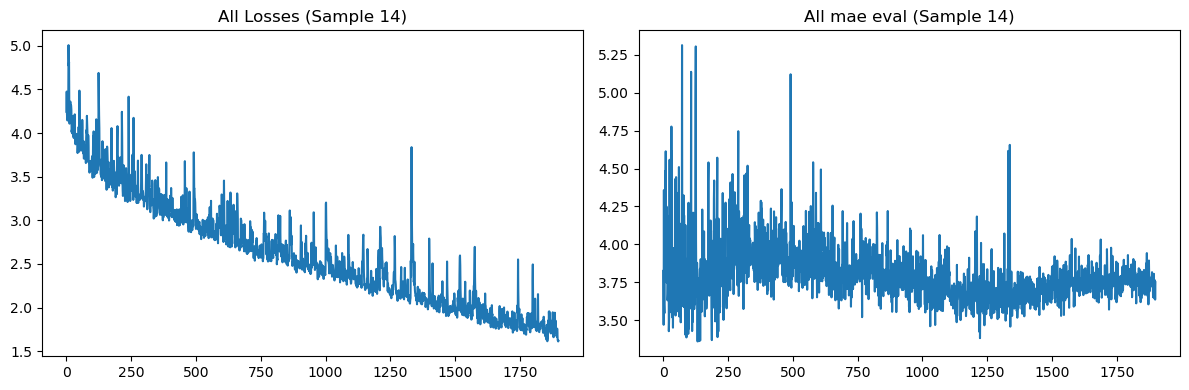

In [11]:
model_index = 1
print (hyper_grid.iloc[model_index - 1,:])

for sample in range (15):

    with open(f'results/model_comparison/all_mae_eval/all_mae_eval_sample_{sample}_model_{model_index}.pkl', "rb") as f:
        all_mae_eval = pickle.load(f)

    with open(f'results/model_comparison/all_losses/all_losses_sample_{sample}_model_{model_index}.pkl', "rb") as f:
        all_losses = pickle.load(f)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

    axes[0].plot(all_losses[100:])
    axes[0].set_title(f'All Losses (Sample {sample})')

    axes[1].plot(all_mae_eval[100:])
    axes[1].set_title(f'All mae eval (Sample {sample})')

    plt.tight_layout()

    plt.show()

## delta_ecum

model                        9
response           delta_e.cum
bidirectional             True
mlp                       True
with_embeddings           True
num_params                None
Name: 8, dtype: object


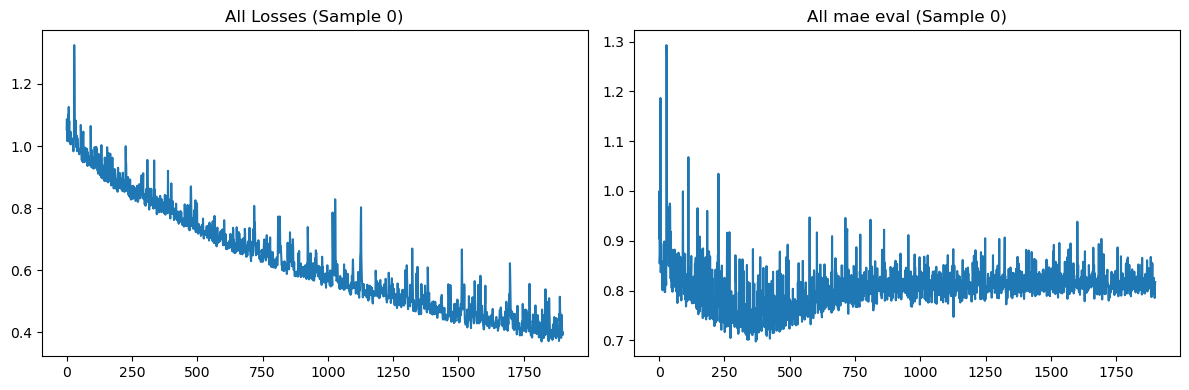

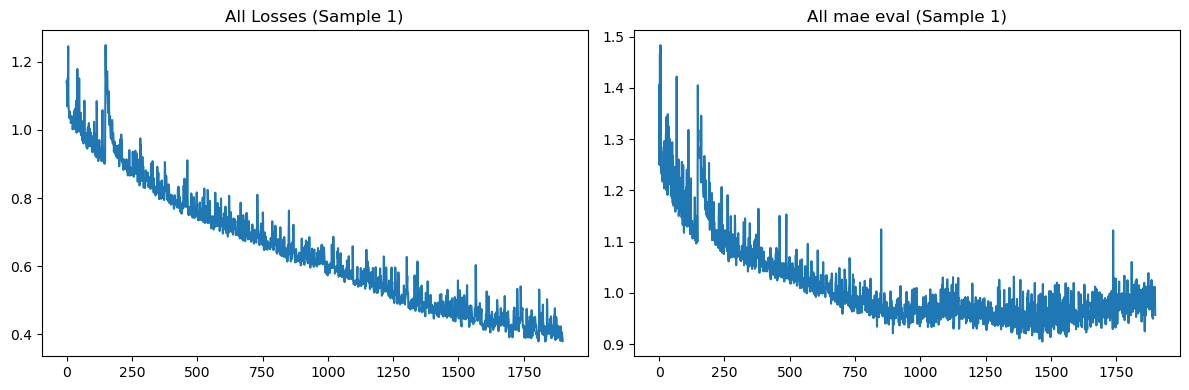

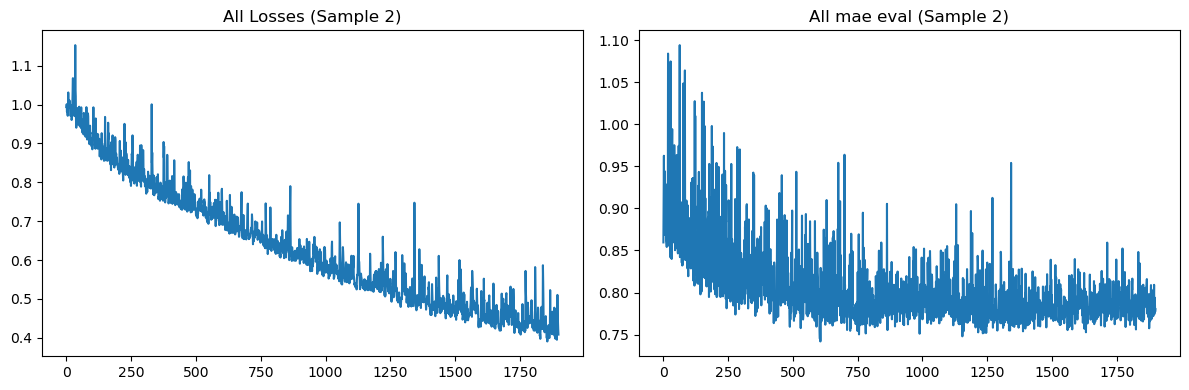

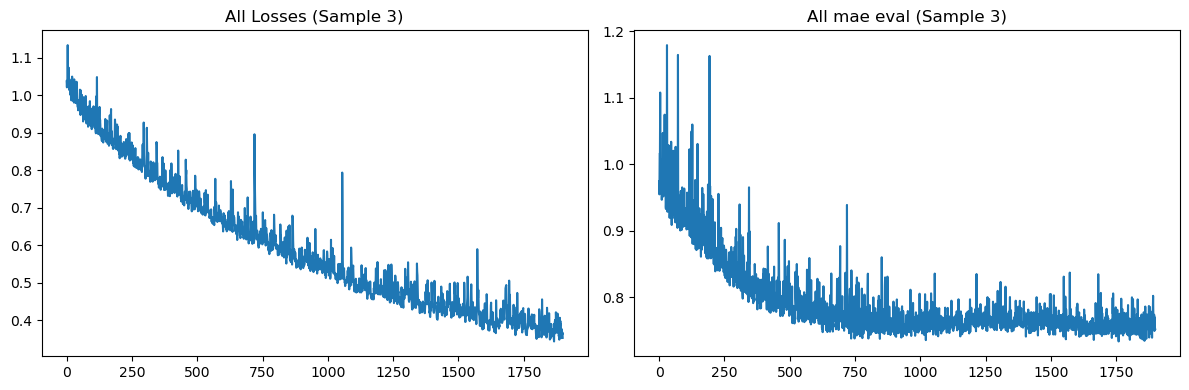

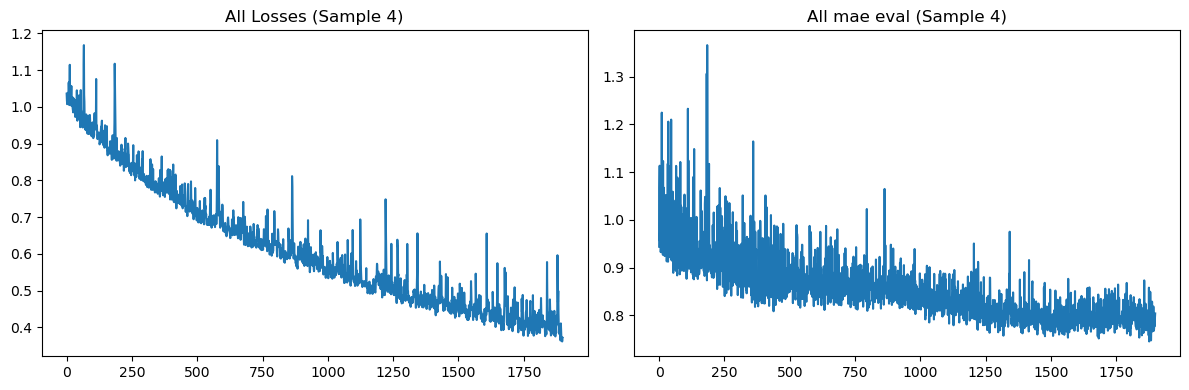

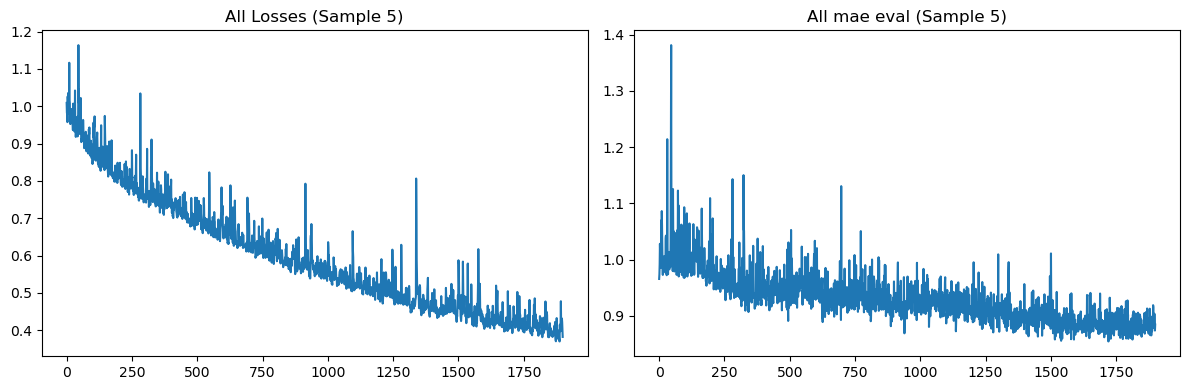

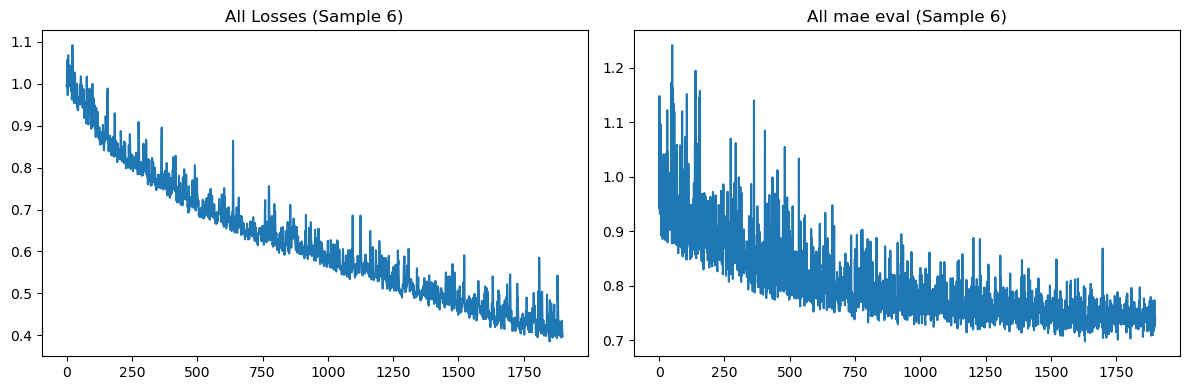

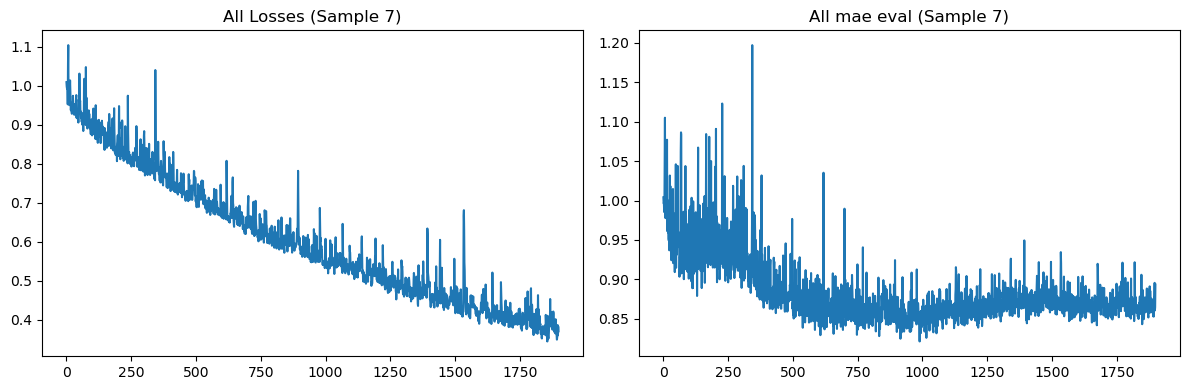

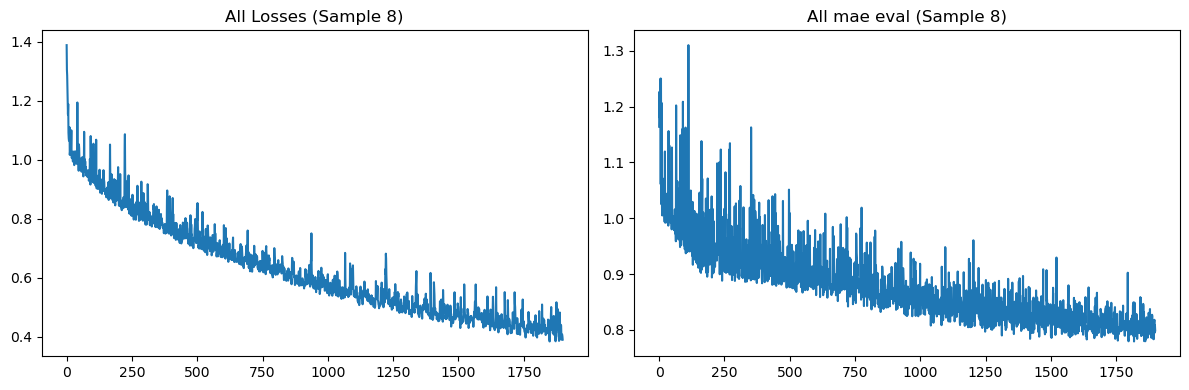

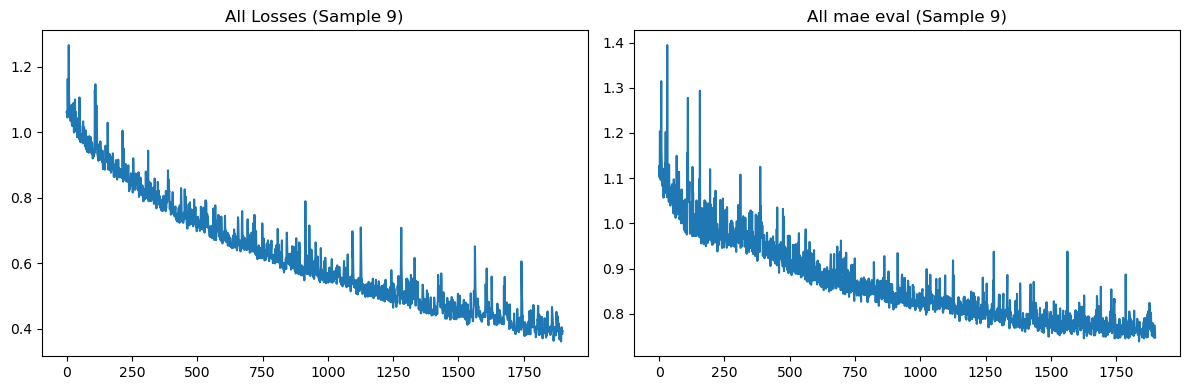

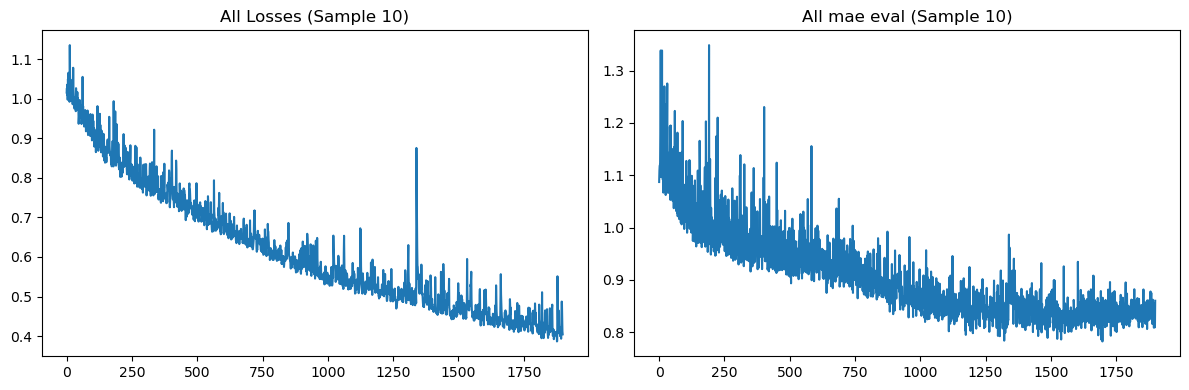

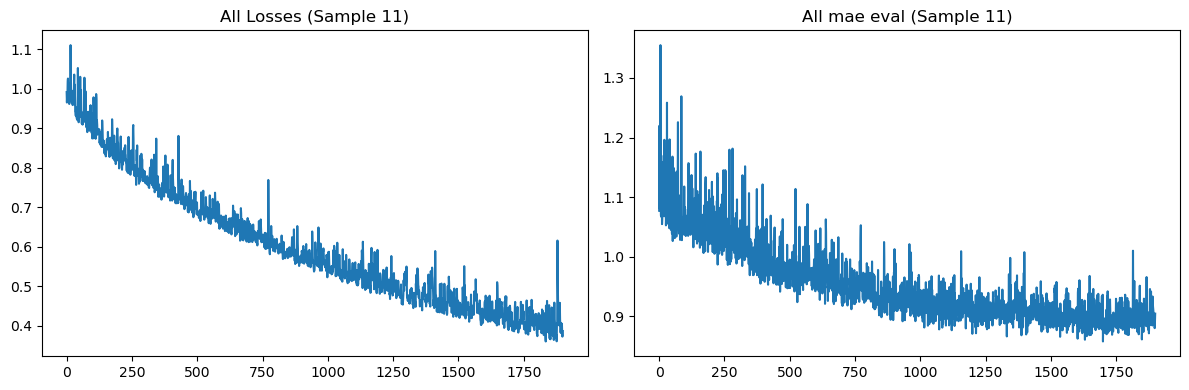

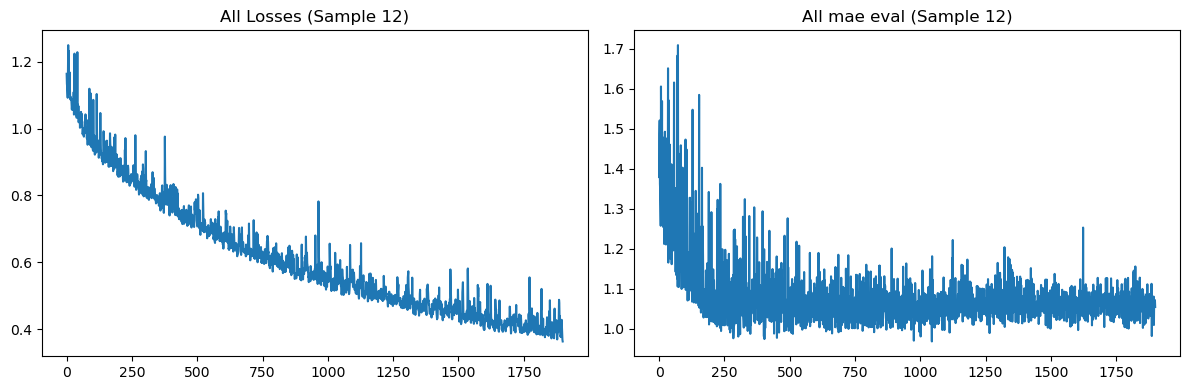

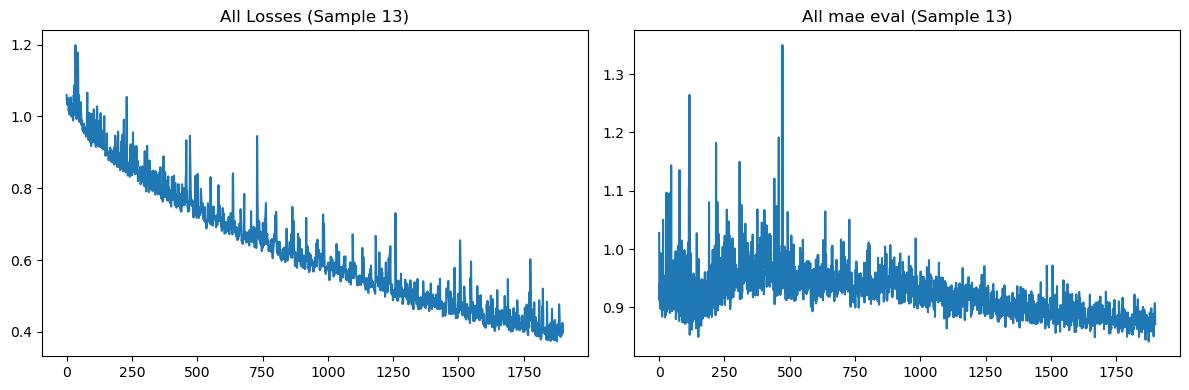

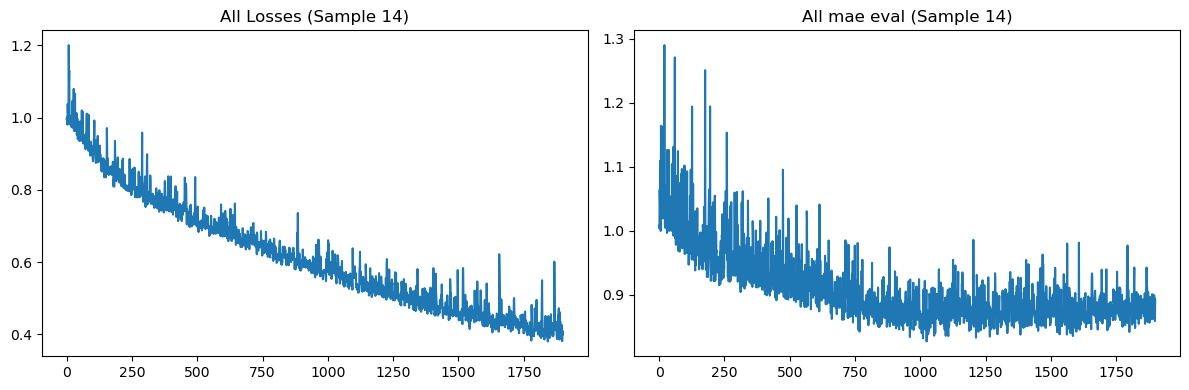

In [19]:
model_index = 9
print (hyper_grid.iloc[model_index - 1,:])

for sample in range (15):

    with open(f'results/model_comparison/all_mae_eval/all_mae_eval_sample_{sample}_model_{model_index}.pkl', "rb") as f:
        all_mae_eval = pickle.load(f)

    with open(f'results/model_comparison/all_losses/all_losses_sample_{sample}_model_{model_index}.pkl', "rb") as f:
        all_losses = pickle.load(f)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

    axes[0].plot(all_losses[100:])
    axes[0].set_title(f'All Losses (Sample {sample})')

    axes[1].plot(all_mae_eval[100:])
    axes[1].set_title(f'All mae eval (Sample {sample})')

    plt.tight_layout()

    plt.show()

## e.cum and delta_ecum => ecum

model                                 17
response           e.cum and delta_e.cum
bidirectional                       True
mlp                                 True
with_embeddings                     True
num_params                          None
Name: 16, dtype: object


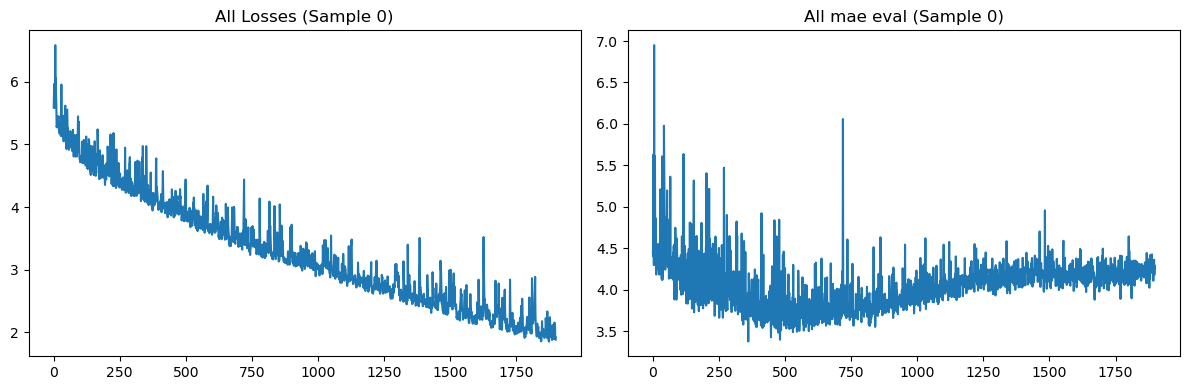

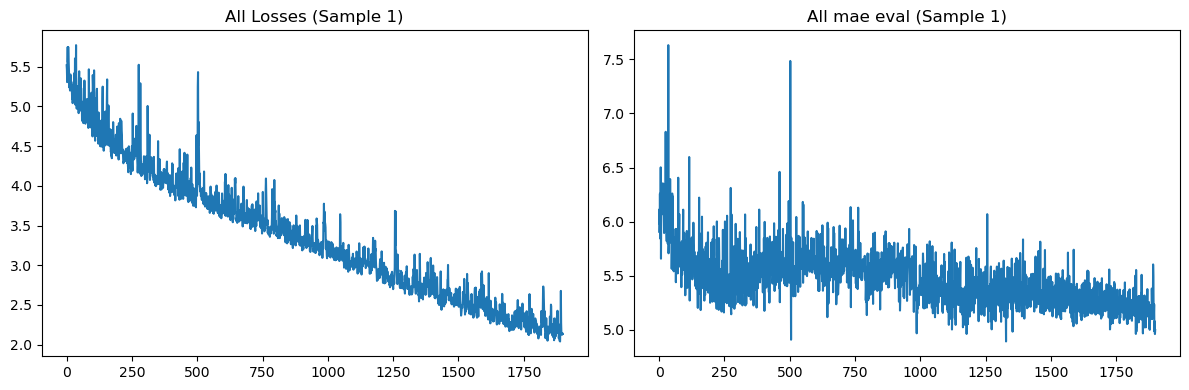

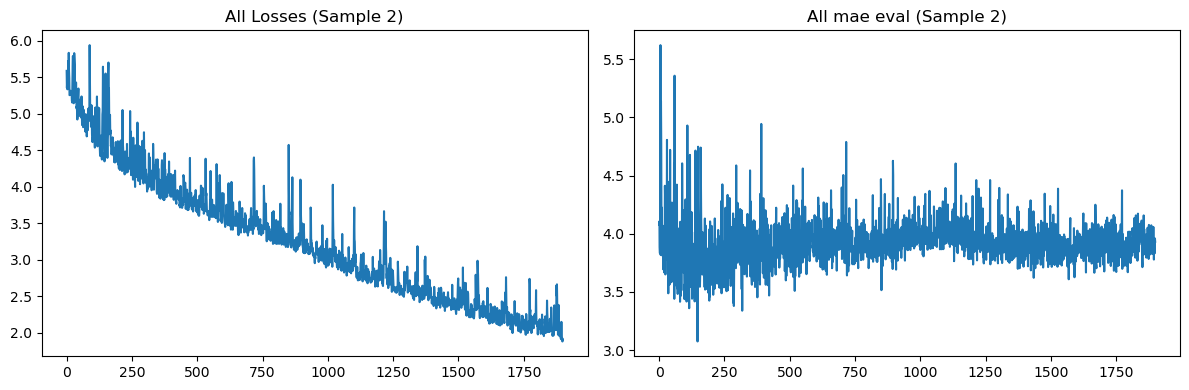

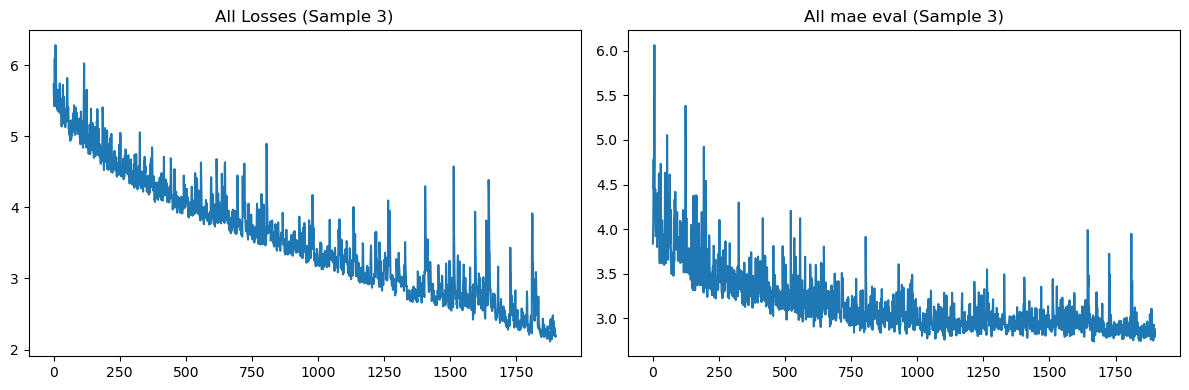

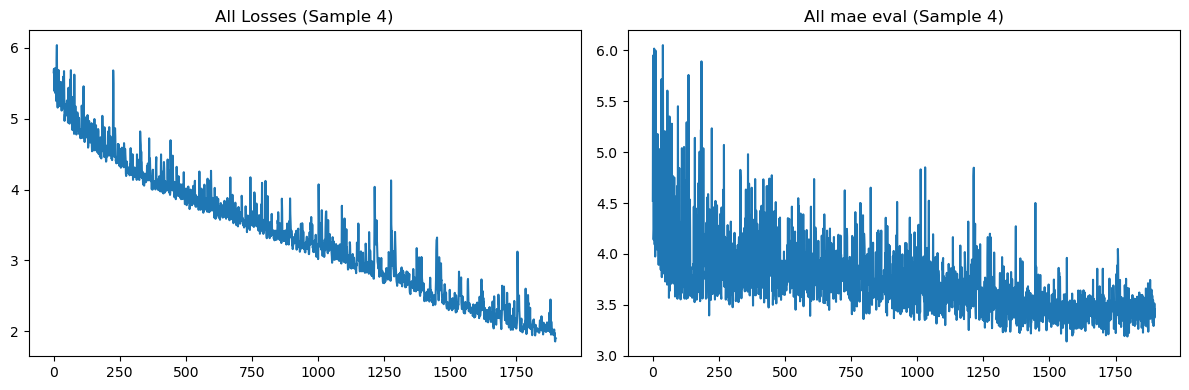

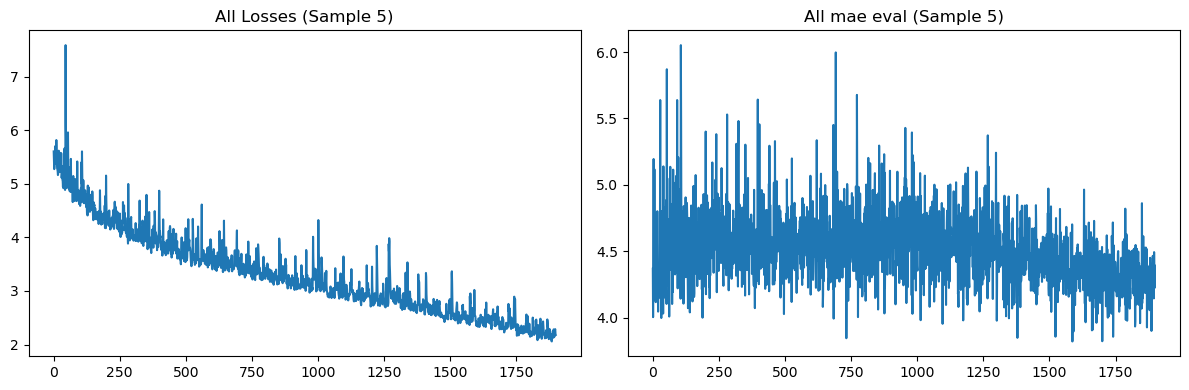

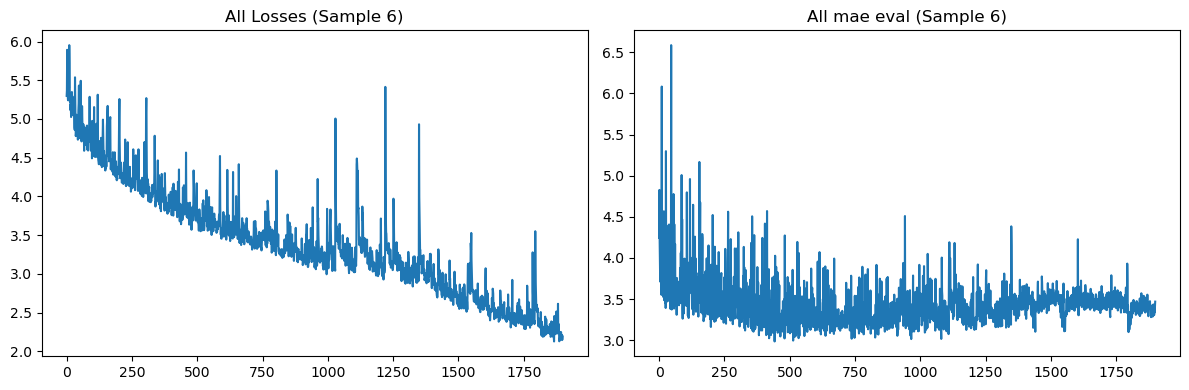

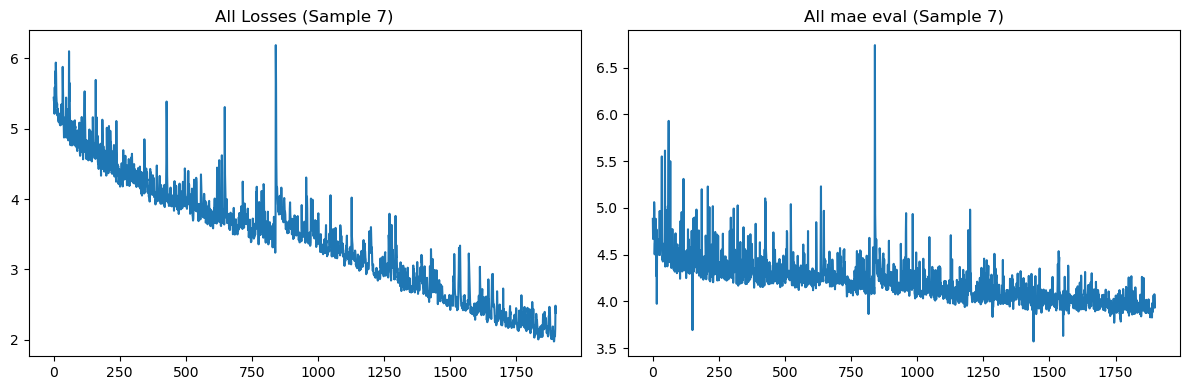

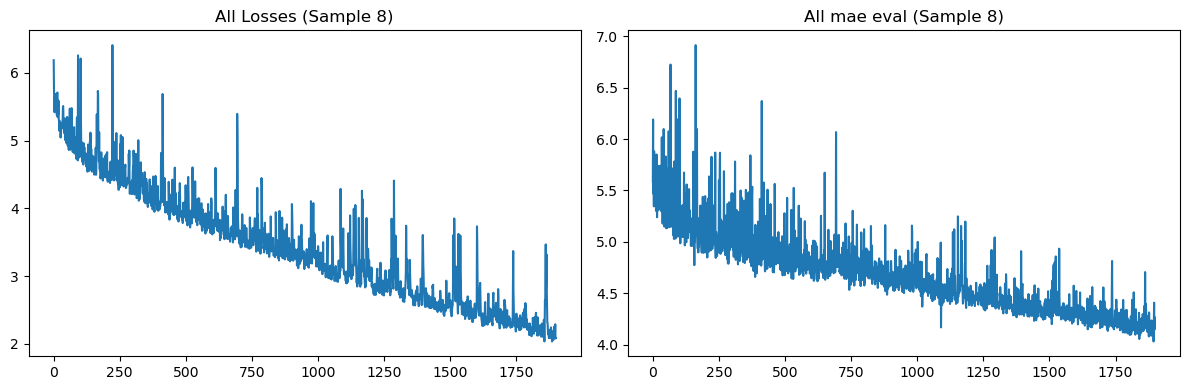

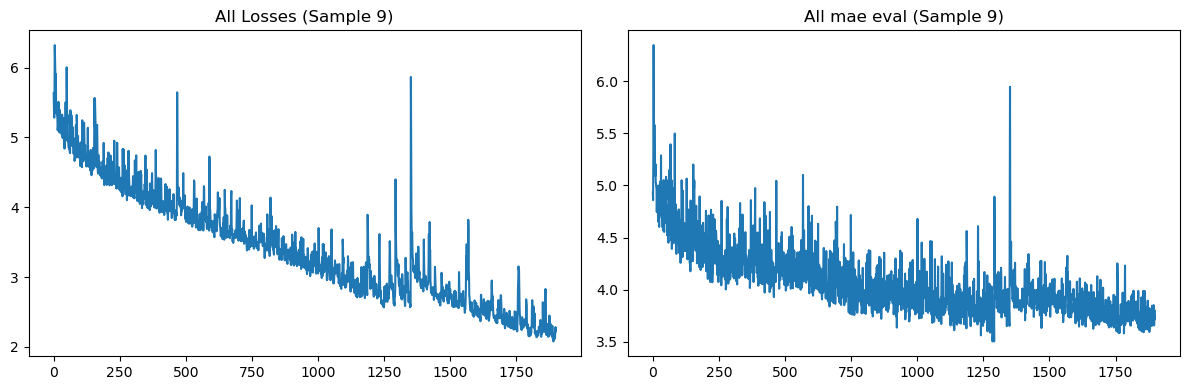

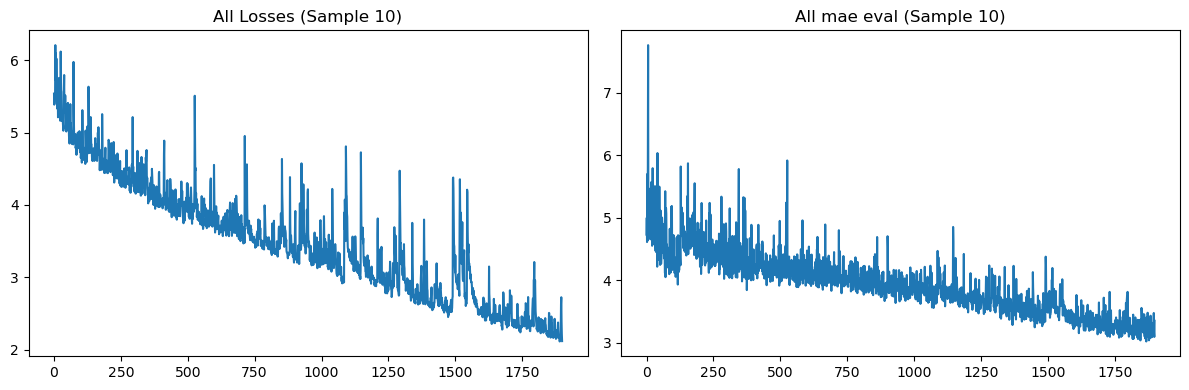

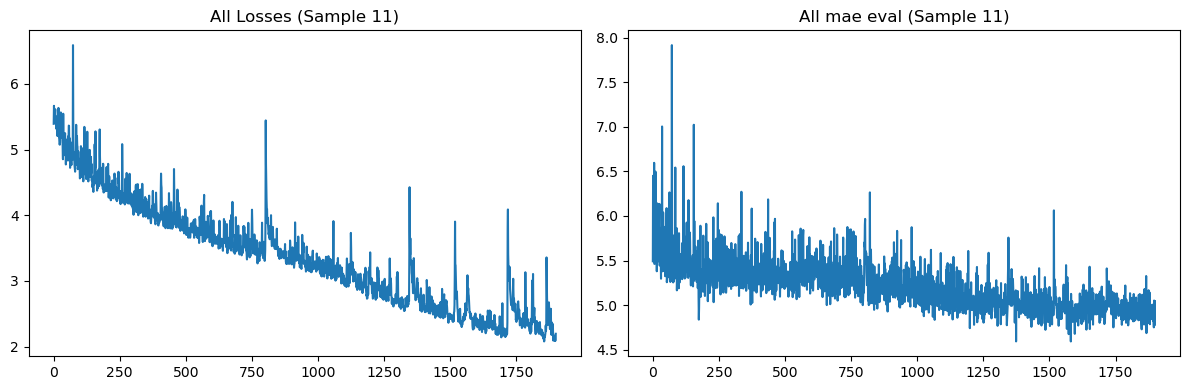

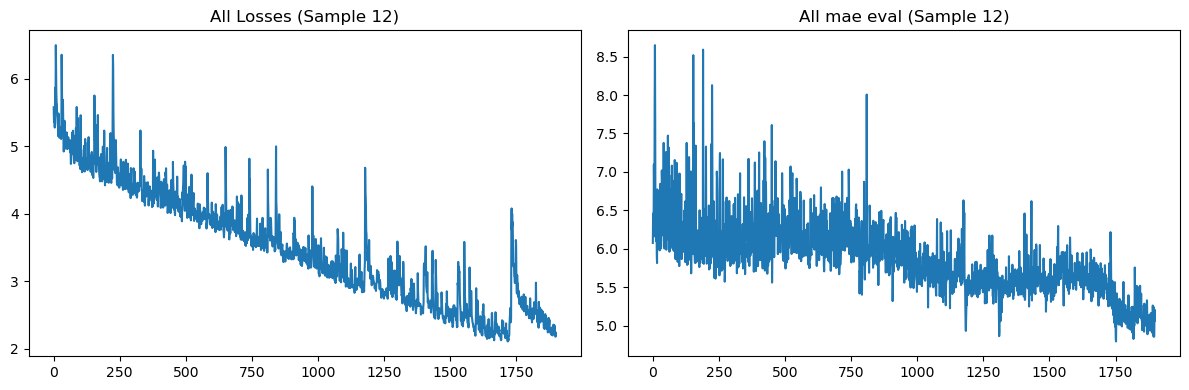

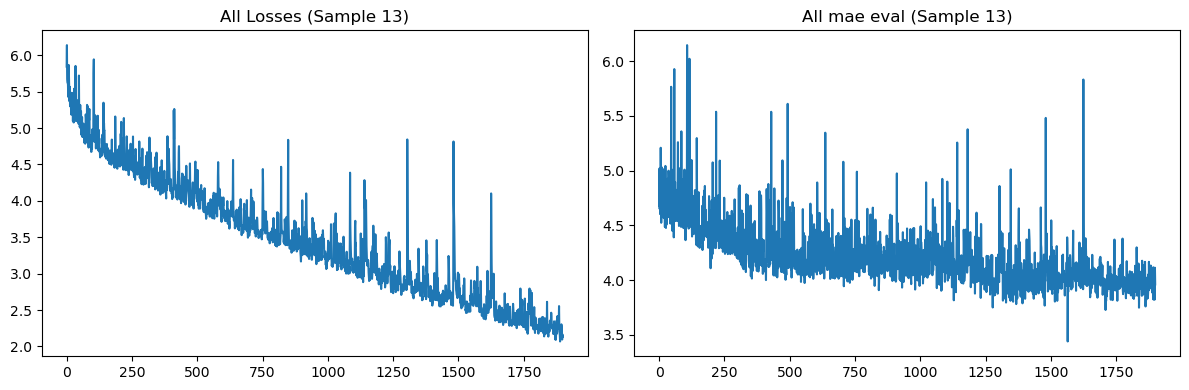

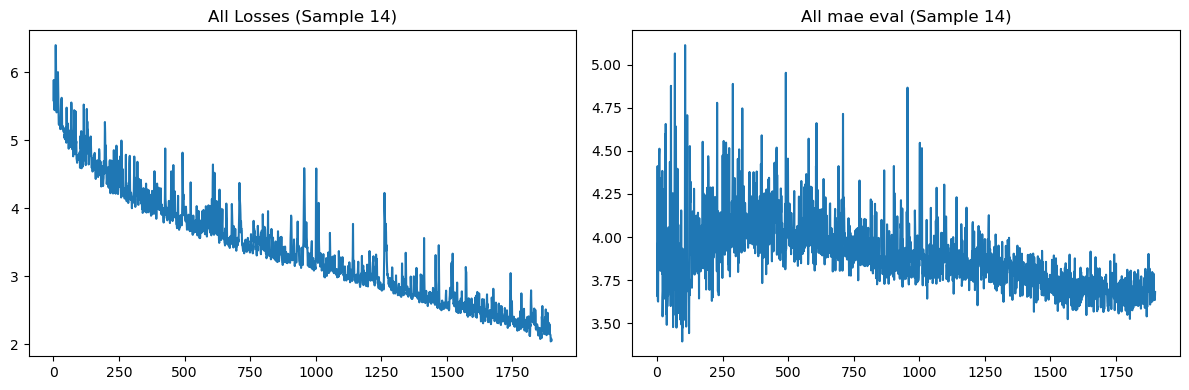

In [28]:
model_index = 17
print (hyper_grid.iloc[model_index - 1,:])

for sample in range (15):

    with open(f'results/model_comparison/all_mae_eval/all_mae_eval_sample_{sample}_model_{model_index}.pkl', "rb") as f:
        all_mae_eval = pickle.load(f)

    with open(f'results/model_comparison/all_losses/all_losses_sample_{sample}_model_{model_index}.pkl', "rb") as f:
        all_losses = pickle.load(f)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

    axes[0].plot(all_losses[100:])
    axes[0].set_title(f'All Losses (Sample {sample})')

    axes[1].plot(all_mae_eval[0][100:])
    axes[1].set_title(f'All mae eval (Sample {sample})')

    plt.tight_layout()

    plt.show()

## e.cum and delta_ecum => delta_ecum

model                                 17
response           e.cum and delta_e.cum
bidirectional                       True
mlp                                 True
with_embeddings                     True
num_params                          None
Name: 16, dtype: object


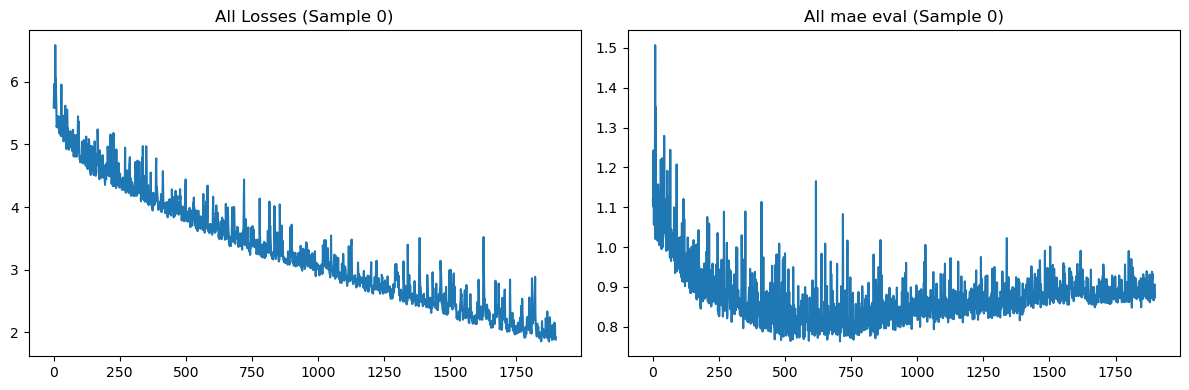

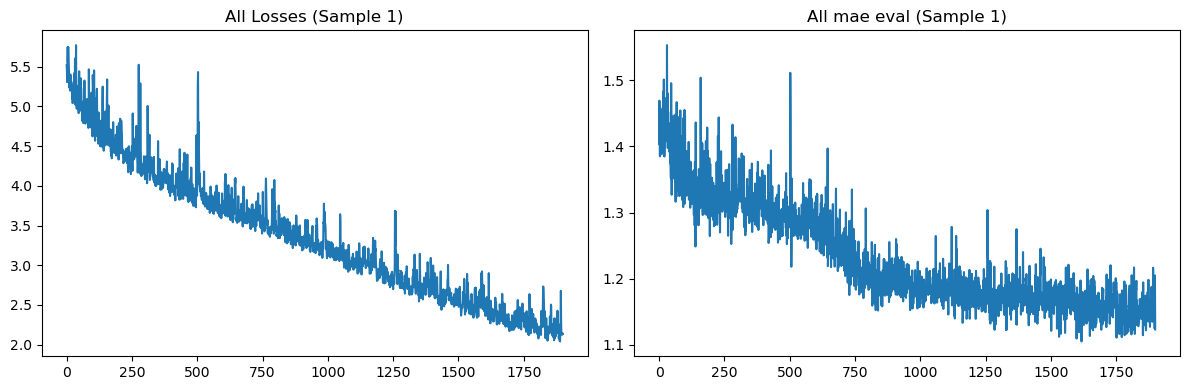

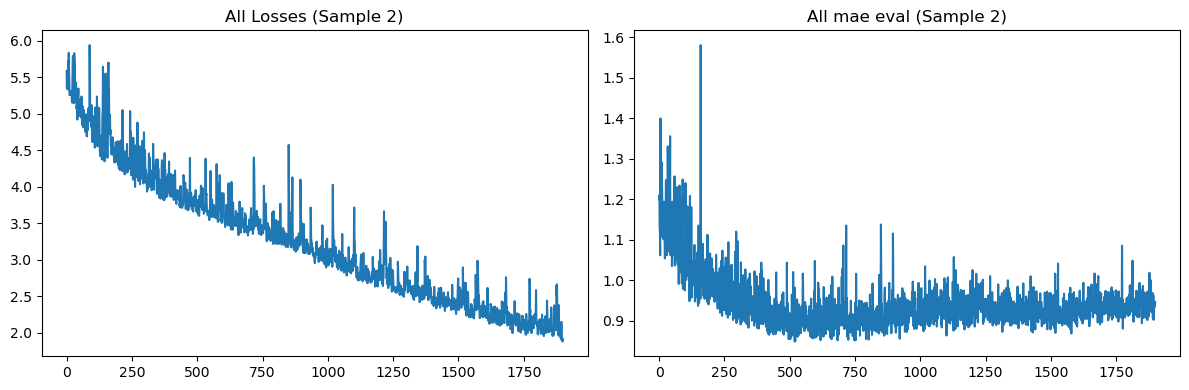

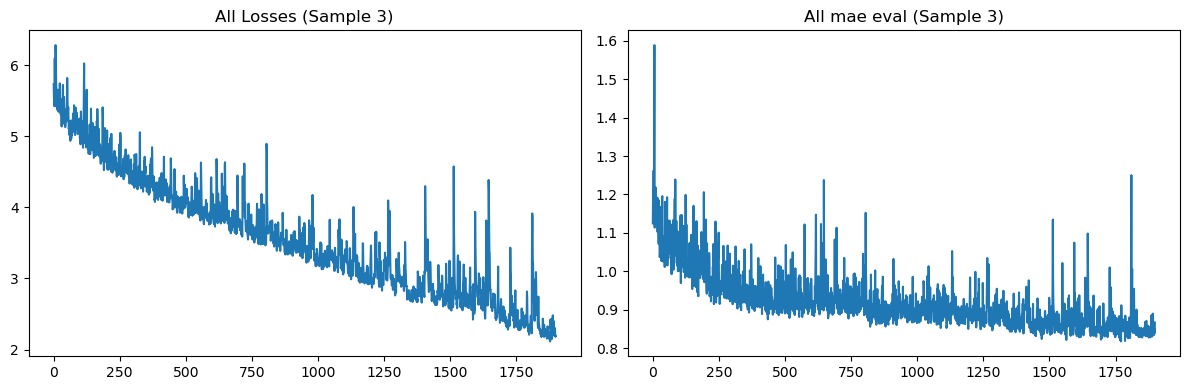

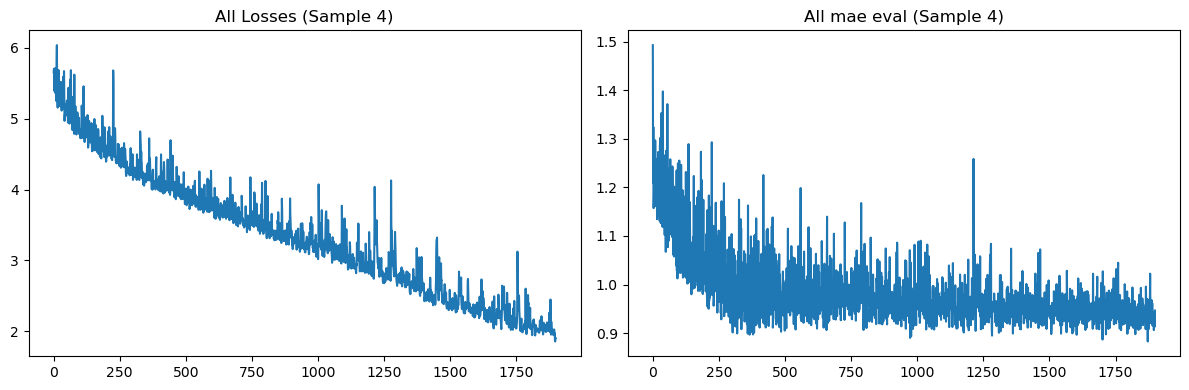

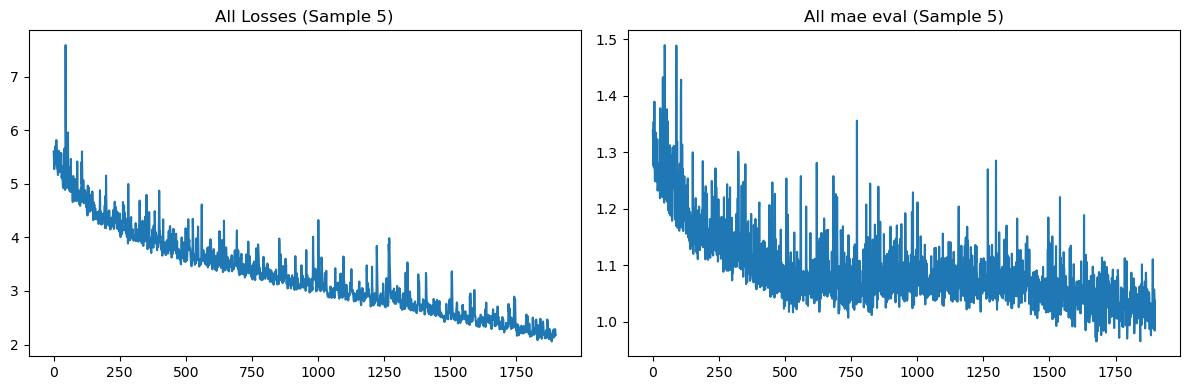

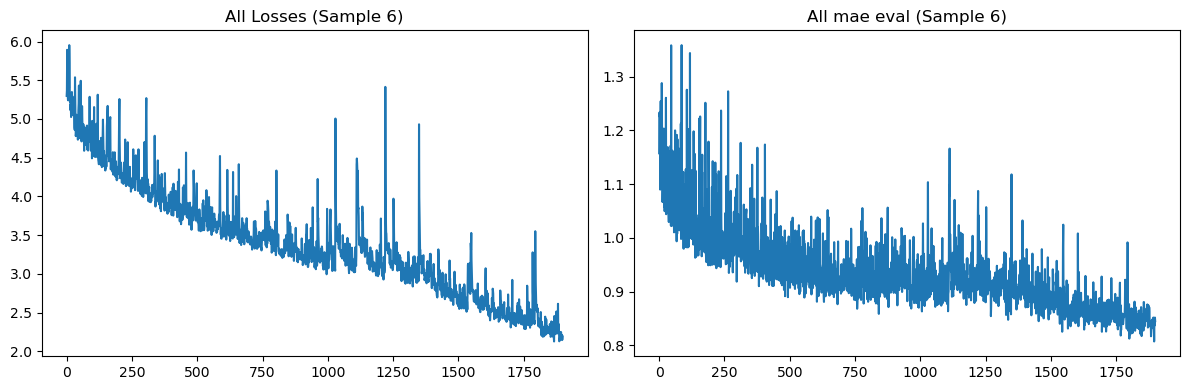

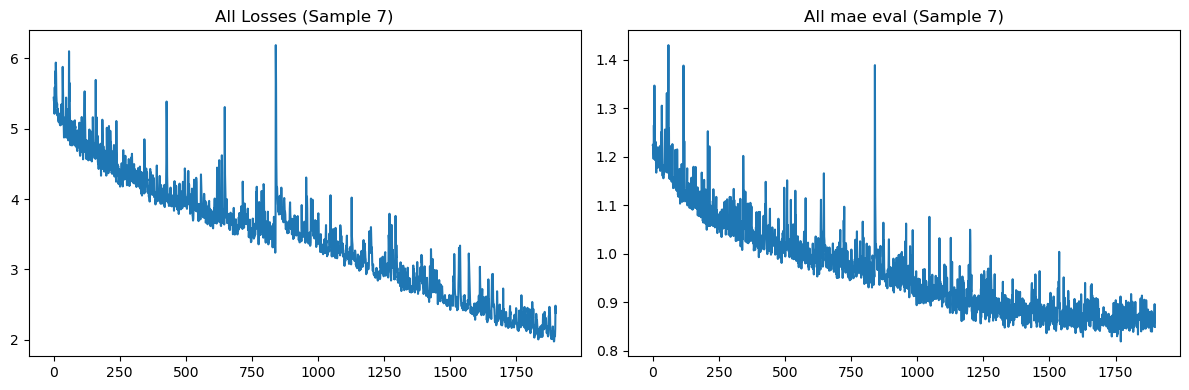

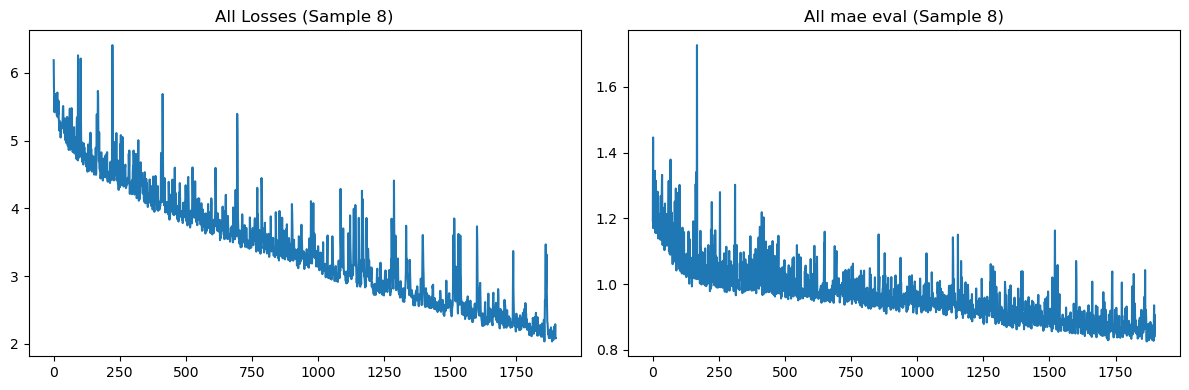

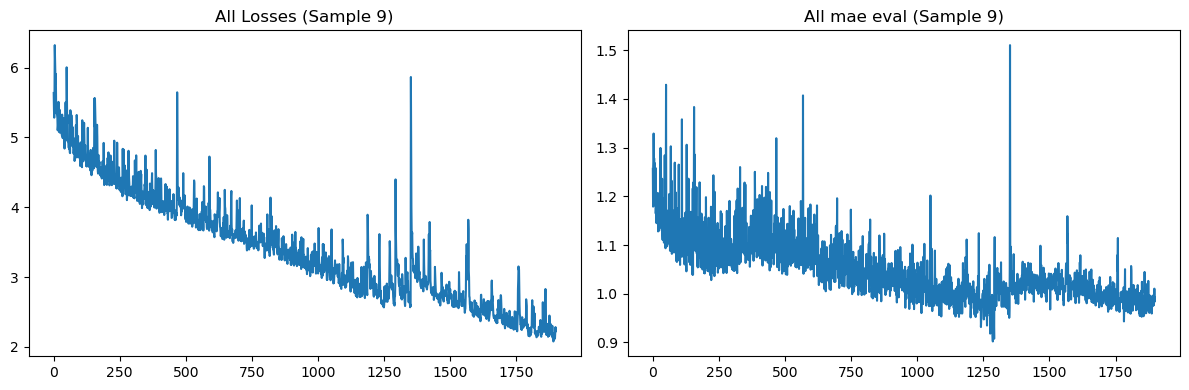

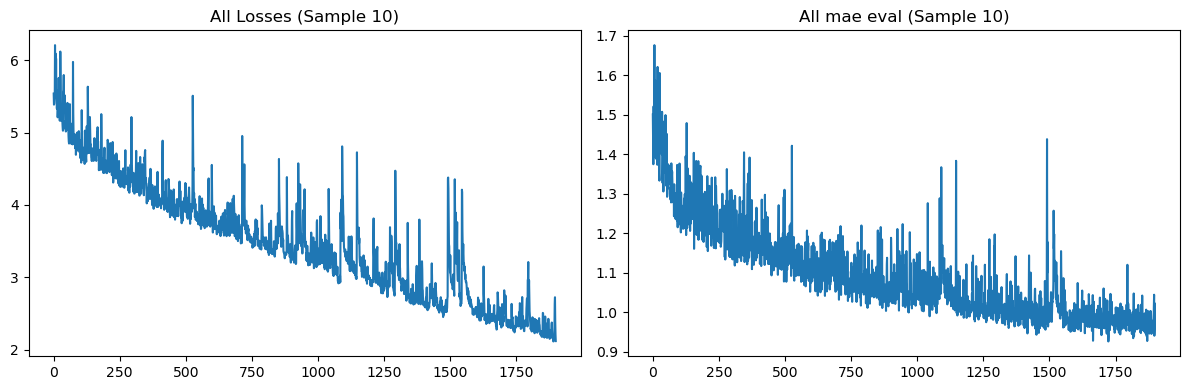

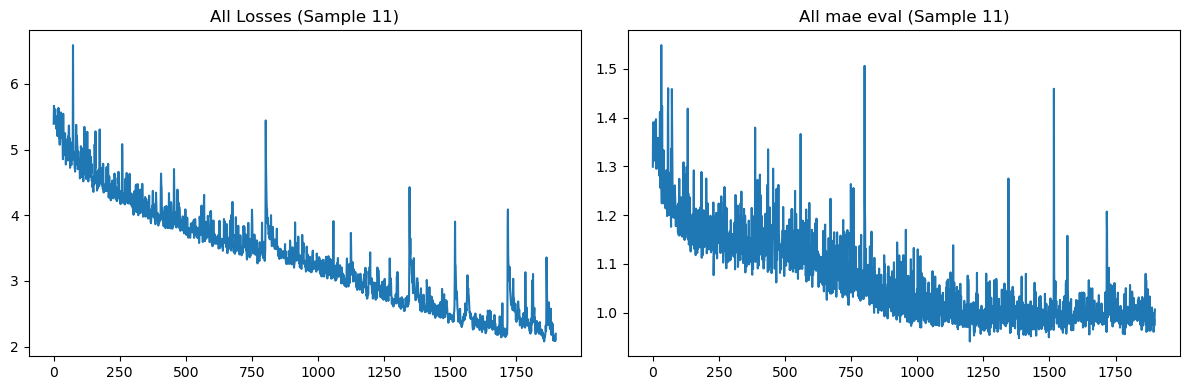

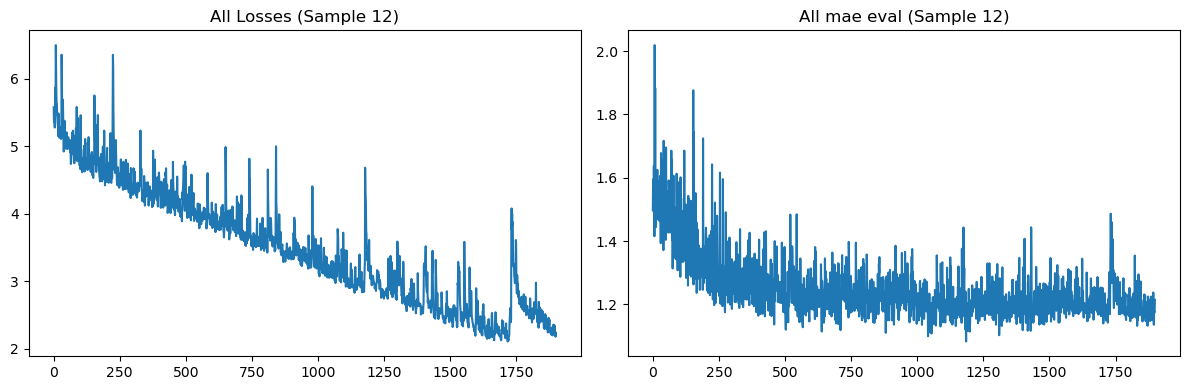

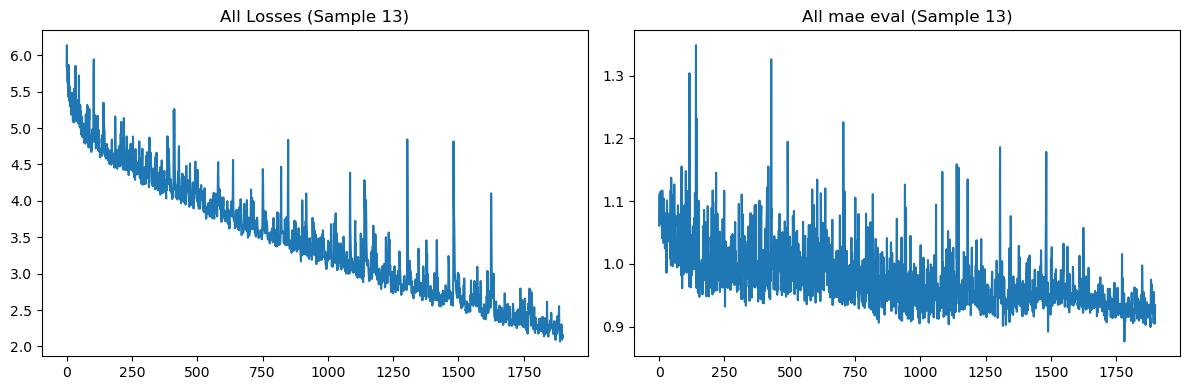

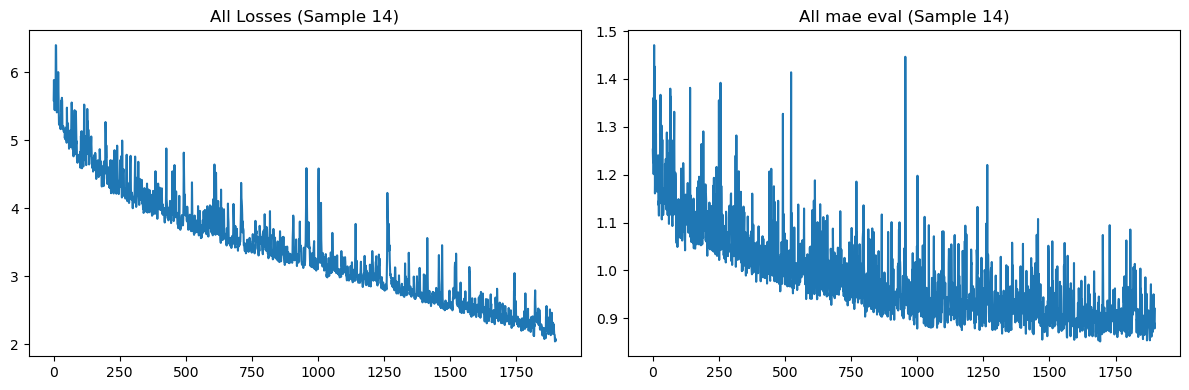

In [36]:
model_index = 17
print (hyper_grid.iloc[model_index - 1,:])

for sample in range (15):

    with open(f'results/model_comparison/all_mae_eval/all_mae_eval_sample_{sample}_model_{model_index}.pkl', "rb") as f:
        all_mae_eval = pickle.load(f)

    with open(f'results/model_comparison/all_losses/all_losses_sample_{sample}_model_{model_index}.pkl', "rb") as f:
        all_losses = pickle.load(f)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

    axes[0].plot(all_losses[100:])
    axes[0].set_title(f'All Losses (Sample {sample})')

    axes[1].plot(all_mae_eval[1][100:])
    axes[1].set_title(f'All mae eval (Sample {sample})')

    plt.tight_layout()

    plt.show()

# Model comparison - MAE boxplots

In [10]:
# Dossier contenant les fichiers
folder_path = "results/06_model_comparison/df_res/"

# Liste pour stocker les DataFrames
df_list = []

# Parcourir tous les fichiers du dossier
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Adapter selon le format des fichiers
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)  # Adapter selon le format (ex: read_excel pour xlsx)
        df_list.append(df)

# Concaténer tous les DataFrames
df_res_rnn = pd.concat(df_list, ignore_index=True)

In [11]:
df_res_rnn.shape

(239424, 13)

In [12]:
df_res_rnn.head (2)

sample  model  pmid   e.cum  delta_e.cum     ct     dt  air.temp  wind.2m  \
0      11     19   190  10.586       10.586   4.25   4.25     12.52     4.02   
1      11     19   190  15.530        4.944  19.75  15.50      9.64     3.16   

   rain.rate  prediction_ecum  prediction_delta_ecum  running_time  
0   0.047059         5.294902               6.012060     19.602061  
1   0.000000         6.804937               0.796497     19.602061

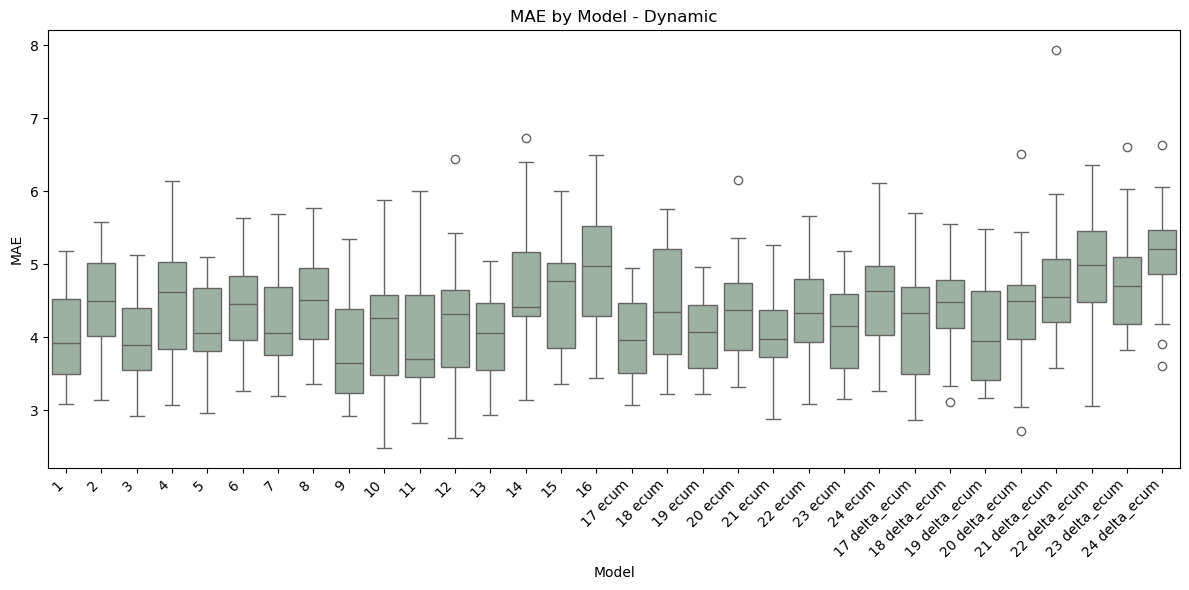

In [34]:
# Sous-ensembles en fonction du modèle
df_res_rnn_ecum = df_res_rnn[df_res_rnn['model'].isin(range(1, 9))].copy()
df_res_rnn_delta_ecum = df_res_rnn[df_res_rnn['model'].isin(range(9, 17))].copy()
df_res_rnn_ecum_delta_ecum = df_res_rnn[df_res_rnn['model'].isin(range(17, 25))].copy()

# Ajout du cumul sur 'prediction_delta_ecum' pour delta_ecum
df_res_rnn_delta_ecum = df_res_rnn_delta_ecum.sort_values('ct')
df_res_rnn_delta_ecum['prediction_ecum'] = df_res_rnn_delta_ecum.groupby(['sample', 'model', 'pmid'])['prediction_delta_ecum'].cumsum()

# Ajout du suffixe "ecum"
df_res_rnn_ecum_delta_ecum_1 = df_res_rnn_ecum_delta_ecum.copy()
df_res_rnn_ecum_delta_ecum_1['model'] = df_res_rnn_ecum_delta_ecum_1['model'].astype(str) + ' ecum'

# Ajout du cumul et du suffixe "delta_ecum"
df_res_rnn_ecum_delta_ecum_2 = df_res_rnn_ecum_delta_ecum.copy()
df_res_rnn_ecum_delta_ecum_2 = df_res_rnn_ecum_delta_ecum_2.sort_values('ct')
df_res_rnn_ecum_delta_ecum_2['prediction_ecum'] = df_res_rnn_ecum_delta_ecum_2.groupby(['sample', 'model', 'pmid'])['prediction_delta_ecum'].cumsum()
df_res_rnn_ecum_delta_ecum_2['model'] = df_res_rnn_ecum_delta_ecum_2['model'].astype(str) + ' delta_ecum'

# Ajout de la colonne 'response2' et concaténation
df_res_rnn_ecum['response2'] = 'ecum'
df_res_rnn_delta_ecum['response2'] = 'delta_ecum'
df_res_rnn_ecum_delta_ecum_1['response2'] = 'ecum2'
df_res_rnn_ecum_delta_ecum_2['response2'] = 'delta_ecum2'

df_res_rnn_all = pd.concat([
    df_res_rnn_ecum,
    df_res_rnn_delta_ecum,
    df_res_rnn_ecum_delta_ecum_1,
    df_res_rnn_ecum_delta_ecum_2
], ignore_index=True)

df_res_rnn_all['model'] = df_res_rnn_all['model'].astype(str)

# Définition des niveaux de modèles pour l'ordre des boîtes
level_models = [
    "1", "2", "3", "4", "5", "6", "7", "8",
    "9", "10", "11", "12", "13", "14", "15", "16",
    "17 ecum", "18 ecum", "19 ecum", "20 ecum", "21 ecum", "22 ecum", "23 ecum", "24 ecum",
    "17 delta_ecum", "18 delta_ecum", "19 delta_ecum", "20 delta_ecum", "21 delta_ecum", "22 delta_ecum", "23 delta_ecum", "24 delta_ecum"
]

# Calcul du MAE
df_res_rnn_all['abs_error'] = (df_res_rnn_all['e.cum'] - df_res_rnn_all['prediction_ecum']).abs()
df_mae = df_res_rnn_all.groupby(['sample', 'model'])['abs_error'].mean().reset_index()
df_mae['model'] = pd.Categorical(df_mae['model'], categories=level_models, ordered=True)

# Affichage boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_mae, x='model', y='abs_error', color="#9bb39f")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("MAE by Model - Dynamic")
plt.tight_layout()
plt.show()


In [31]:
df_res_rnn_all_filtered = (
    df_res_rnn_all.loc[
        df_res_rnn_all.groupby(['sample', 'model', 'pmid'])['ct'].transform('max') 
        == df_res_rnn_all['ct']
    ].copy()
)

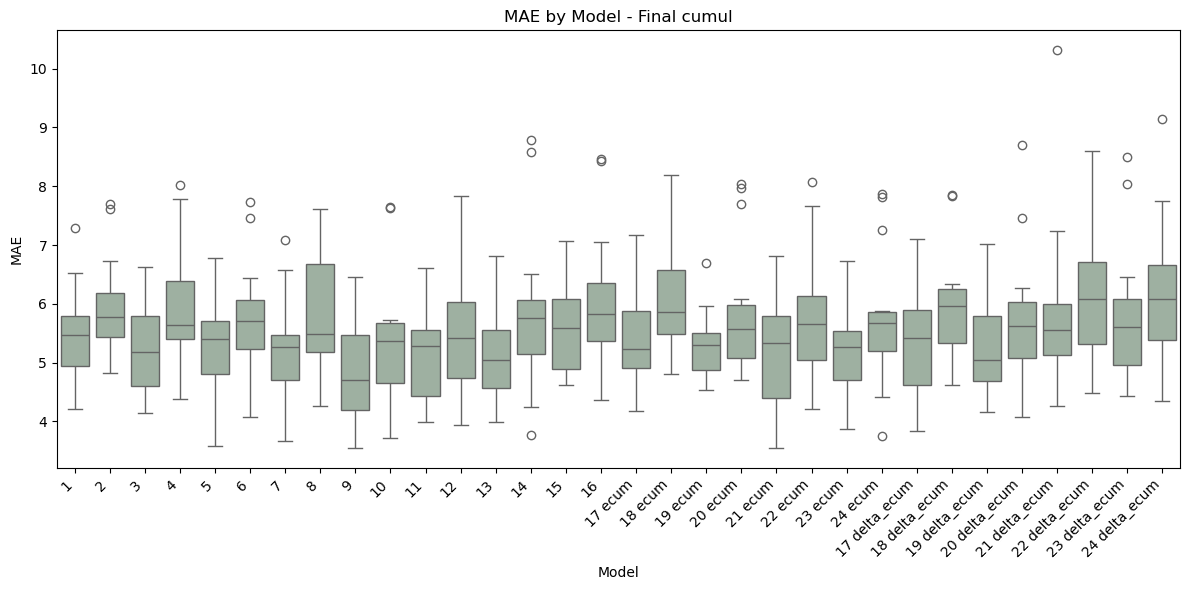

In [33]:
# Calcul du MAE
df_res_rnn_all_filtered['abs_error'] = (df_res_rnn_all_filtered['e.cum'] - df_res_rnn_all_filtered['prediction_ecum']).abs()
df_mae = df_res_rnn_all_filtered.groupby(['sample', 'model'])['abs_error'].mean().reset_index()
df_mae['model'] = pd.Categorical(df_mae['model'], categories=level_models, ordered=True)

# Affichage boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_mae, x='model', y='abs_error', color="#9bb39f")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("MAE by Model - Final cumul")
plt.tight_layout()
plt.show()
v

# Predictions on scenarios

Prédictions pour 3 sets de conditions différentes, avec à chaque foix plusieurs choix de séquences de temps. On voit qu'il y a une forte dépendance au choix de la séquence des temps.

Solutions possible : 
- entrainer sur données interpolés
- entrainer sur données 'augmentées' => devrait aider à régulariser

In [118]:
df_scenarios = pd.read_csv('results/08_predictions_on_scenarios/effect_of_timeseq_for_predictions.csv')  

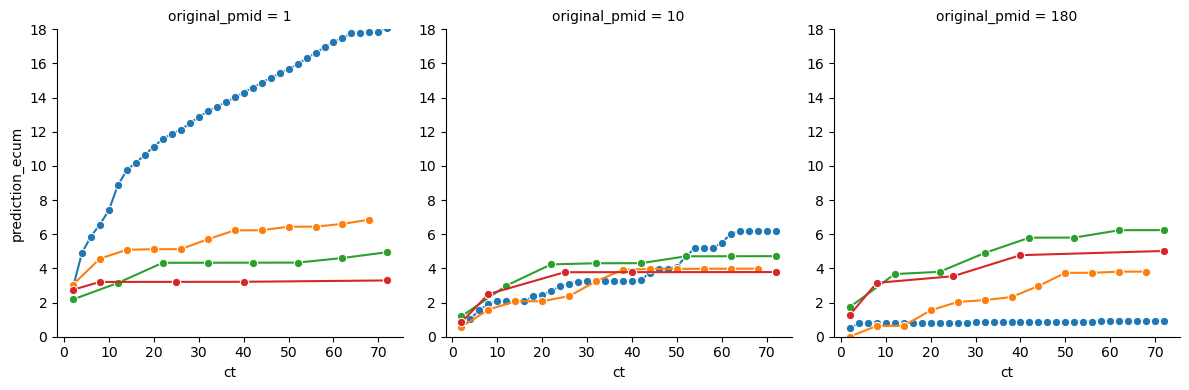

In [119]:
g = sns.FacetGrid(df_scenarios, col='original_pmid', col_wrap=3, height=4, aspect = 1, sharex=False, sharey=False)
g.map_dataframe(sns.lineplot, x='ct', y='prediction_ecum', hue='seq_time', marker='o', palette='tab10')

for ax in g.axes.flatten():
    ax.set_ylim(0, 18)

plt.tight_layout()
plt.show()

# Cross validation with interpolation and data augmentation

In [69]:
folder_path = "results/09_1_model_comparison_with_interpolation/df_res/"

df_list = []

for file in os.listdir(folder_path):
    if file.endswith(".csv"): 
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)  
        df_list.append(df)

df_res_rnn_9_interpolation = pd.concat(df_list, ignore_index=True)
df_res_rnn_9_interpolation['model'] = 'interpolation'

In [ ]:
data = pd.read_csv ("../data/processed_data/data_rnn_1.csv")

samples = df_res_rnn_9_interpolation['sample'].unique()
df_zero = pd.DataFrame()

# Première boucle : ajout d'un point à t=0 avec prediction_ecum = 0
for i in samples:
    df_sample = df_res_rnn_9_interpolation[df_res_rnn_9_interpolation['sample'] == i]
    pmids = df_sample['pmid'].unique()

    for k in pmids:
        df_tmp = df_sample[df_sample['pmid'] == k].copy()
        first_row = df_tmp.iloc[0].copy()
        first_row['prediction_ecum'] = 0
        first_row['ct'] = 0

        df_tmp = pd.concat([pd.DataFrame([first_row]), df_tmp], ignore_index=True)
        df_zero = pd.concat([df_zero, df_tmp], ignore_index=True)

# Deuxième boucle : interpolation sur les vrais temps
df_res_rnn_9_interpolation_to_observed_times = pd.DataFrame()

for i in samples:
    df_sample = df_zero[df_zero['sample'] == i]
    pmids = df_sample['pmid'].unique()

    for k in pmids:
        df_tmp = df_sample[df_sample['pmid'] == k]
        df_res_rnn_interpolated_tmp = data[data['pmid'] == k].copy()

        real_times = df_res_rnn_interpolated_tmp['ct'].values

        f_interp = interp1d(df_tmp['ct'], df_tmp['prediction_ecum'], kind='linear', fill_value='extrapolate')
        df_res_rnn_interpolated_tmp['prediction_ecum'] = f_interp(real_times)
        df_res_rnn_interpolated_tmp['sample'] = i
        df_res_rnn_interpolated_tmp['model'] = "interpolation"

        df_res_rnn_9_interpolation_to_observed_times = pd.concat([df_res_rnn_9_interpolation_to_observed_times, df_res_rnn_interpolated_tmp], ignore_index=True)

In [138]:
folder_path = "results/10_1_model_comparison_with_data_augmentation/df_res/"

df_list = []

for file in os.listdir(folder_path):
    if file.endswith(".csv"): 
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)  
        df_list.append(df)

df_res_rnn_9_data_augmentation = pd.concat(df_list, ignore_index=True)
df_res_rnn_9_data_augmentation['model'] = 'data augmentation'

In [139]:
df_res_rnn_9_data_augmentation.head (2)

sample              model  n_parameters  pmid   e.cum  delta_e.cum     ct  \
0      11  data augmentation        570474   190  10.586       10.586   4.25   
1      11  data augmentation        570474   190  15.530        4.944  19.75   

      dt  air.temp  wind.2m  rain.rate  prediction_ecum  \
0   4.25     12.52     4.02   0.047059         6.762339   
1  15.50      9.64     3.16   0.000000         8.817068   

   prediction_delta_ecum  running_time  
0               6.762339    267.213172  
1               2.054728    267.213172

In [144]:
df_res_rnn_9 = df_res_rnn[df_res_rnn['model'] == 9].copy()
df_res_rnn_9['model'] = 'real_data'
df_res_rnn_9['prediction_ecum'] = df_res_rnn_9.groupby(['sample', 'model', 'pmid'])['prediction_delta_ecum'].cumsum()

In [145]:
df_res_rnn_9.head (2)

sample      model  pmid   e.cum  delta_e.cum     ct     dt  air.temp  \
1305       4  real_data   184  8.2802       8.2802   5.15   5.15     11.15   
1306       4  real_data   184  9.4622       1.1820  20.15  15.00      8.43   

      wind.2m  rain.rate  prediction_ecum  prediction_delta_ecum  running_time  
1305     8.27        0.0         5.560862               5.560862     25.796148  
1306     6.23        0.0         6.745513               1.184652     25.796148

In [151]:
df_comparison = pd.concat([df_res_rnn_9[['sample', 'model', 'pmid', 'e.cum', 'prediction_ecum', 'ct']], 
                           df_res_rnn_9_interpolation_to_observed_times[['sample', 'model', 'pmid', 'e.cum', 'prediction_ecum', 'ct']], 
                           df_res_rnn_9_data_augmentation[['sample', 'model', 'pmid', 'e.cum', 'prediction_ecum', 'ct']]], 
                          ignore_index = True)

In [152]:
df_comparison.head (2)

sample      model  pmid   e.cum  prediction_ecum     ct
0       4  real_data   184  8.2802         5.560862   5.15
1       4  real_data   184  9.4622         6.745513  20.15

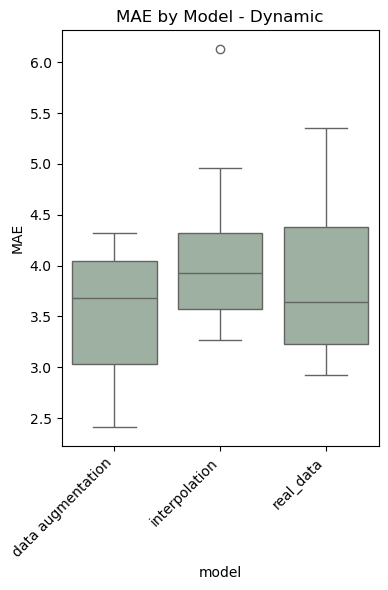

In [153]:
# Calcul du MAE
df_comparison['abs_error'] = (df_comparison['e.cum'] - df_comparison['prediction_ecum']).abs()
df_mae = df_comparison.groupby(['sample', 'model'])['abs_error'].mean().reset_index()
#df_mae['model'] = pd.Categorical(df_mae['model'], categories=level_models, ordered=True)

# Affichage boxplot
plt.figure(figsize=(4, 6))
sns.boxplot(data=df_mae, x='model', y='abs_error', color="#9bb39f")
plt.xticks(rotation=45, ha='right')
plt.ylabel("MAE")
plt.title("MAE by Model - Dynamic")
plt.tight_layout()
plt.show()

In [154]:
df_comparison_filtered = (
    df_comparison.loc[
        df_comparison.groupby(['sample', 'model', 'pmid'])['ct'].transform('max') 
        == df_comparison['ct']
    ].copy()
)

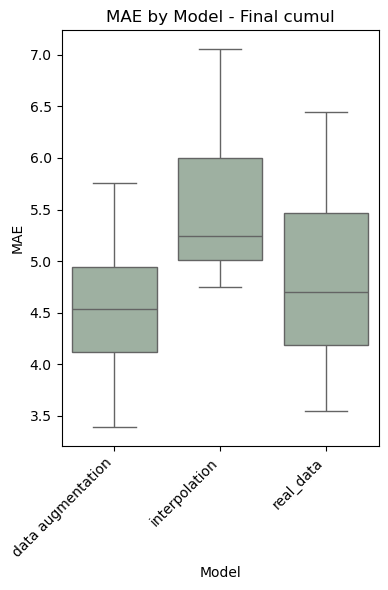

In [156]:
# Calcul du MAE
df_mae = df_comparison_filtered.groupby(['sample', 'model'])['abs_error'].mean().reset_index()

# Affichage boxplot
plt.figure(figsize=(4, 6))
sns.boxplot(data=df_mae, x='model', y='abs_error', color="#9bb39f")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("MAE by Model - Final cumul")
plt.tight_layout()
plt.show()

# Predictions on scenarios with the new models

## With interpolation

In [82]:
predictions_scenario_with_interpolation = pd.read_csv('results/09_2_predictions_on_scenarios_with_interpolation/predictions_on_scenarios_rnn_interpolation.csv')

In [83]:
predictions_scenario_with_interpolation.head (2)

scenario  pmid       strategy  group_temp  group_wind  group_rain  ct  dt  \
0         1     1  Incorporation           1           1           1   2   2   
1         1     1  Incorporation           1           1           1   4   2   

   air.temp  wind.2m  rain.rate  tan.app  app.mthd  app.rate  man.dm  man.ph  \
0      11.2      2.3        0.0     36.7         0      18.7     3.8     7.5   
1      11.2      2.3        0.0     36.7         0      18.7     3.8     7.5   

   man.source  incorp  t.incorp  prediction_ecum  prediction_delta_ecum  
0           0       1         0         0.921203               0.921203  
1           0       1         0         2.253746               1.332543

/tmp/ipykernel_892436/382110632.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_efficacy)


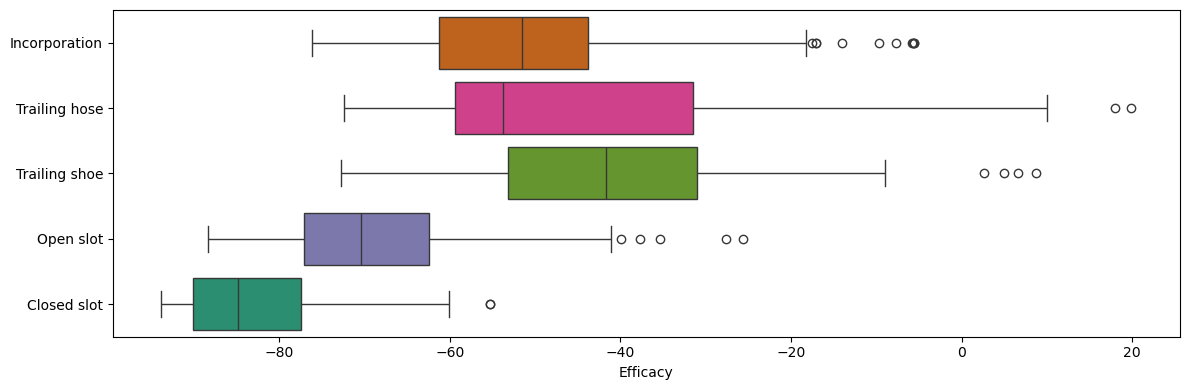

In [106]:
# 1. Filtrer les dernières lignes (max ct) par pmid
df_efficacy_with_interpolation = (
    predictions_scenario_with_interpolation
    .sort_values("ct")
    .groupby("pmid")
    .tail(1)
    .copy()
)

# 2. Calcul de l'efficacité par scénario
def compute_efficacy(group):
    broadcast_value = group.loc[group["strategy"] == "Broadcast", "prediction_ecum"]
    if not broadcast_value.empty:
        group["efficacy"] = ((group["prediction_ecum"] / broadcast_value.values[0]) - 1) * 100
    else:
        group["efficacy"] = None
    return group

df_efficacy_with_interpolation = (
    df_efficacy_with_interpolation
    .groupby("scenario", group_keys=False)
    .apply(compute_efficacy)
)

# 3. Filtrer les stratégies différentes de "Broadcast"
df_plot = df_efficacy_with_interpolation[df_efficacy_with_interpolation["strategy"] != "Broadcast"].copy()

# 4. Ordre personnalisé des stratégies
strategy_order = ["Incorporation", "Trailing hose", "Trailing shoe", "Open slot", "Closed slot"]

# 5. Couleurs type Dark2 (palette Seaborn ou matplotlib)
dark2_palette = sns.color_palette("Dark2", n_colors=len(strategy_order))
dark2_palette = [dark2_palette[i] for i in [3, 4, 1, 2, 0]]


# 6. Tracer le boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(
    data=df_plot,
    x="efficacy",
    y="strategy",
    order=strategy_order,
    hue = "strategy",
    legend = False,
    palette=dark2_palette
)

plt.xlabel("Efficacy")
plt.ylabel("")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## With data augmentation

Prédictions pour 3 sets de conditions différentes, avec à chaque foix plusieurs choix de séquences de temps.

In [157]:
df_scenarios_data_augmentation = pd.read_csv('results/10_2_predictions_on_scenarios_with_data_augmentation/effect_of_timeseq_for_predictions.csv')  

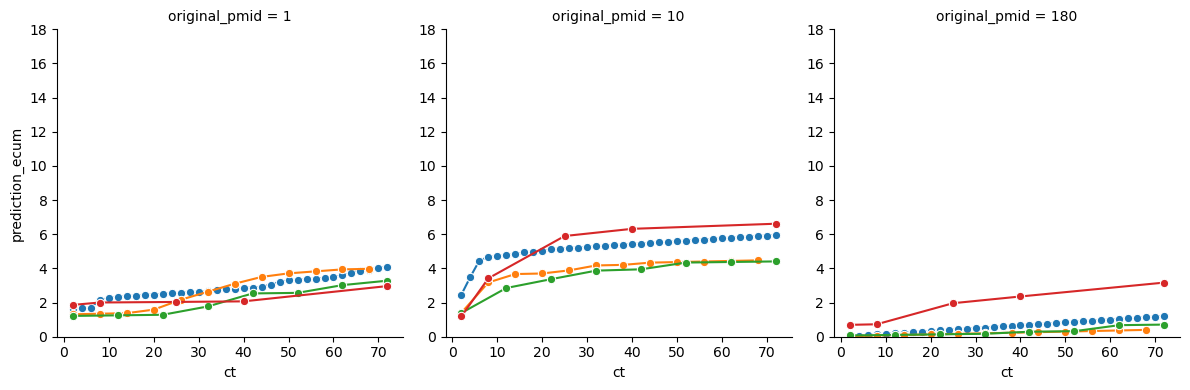

In [158]:
g = sns.FacetGrid(df_scenarios_data_augmentation, col='original_pmid', col_wrap=3, height=4, aspect = 1, sharex=False, sharey=False)
g.map_dataframe(sns.lineplot, x='ct', y='prediction_ecum', hue='seq_time', marker='o', palette='tab10')

for ax in g.axes.flatten():
    ax.set_ylim(0, 18)

plt.tight_layout()
plt.show()

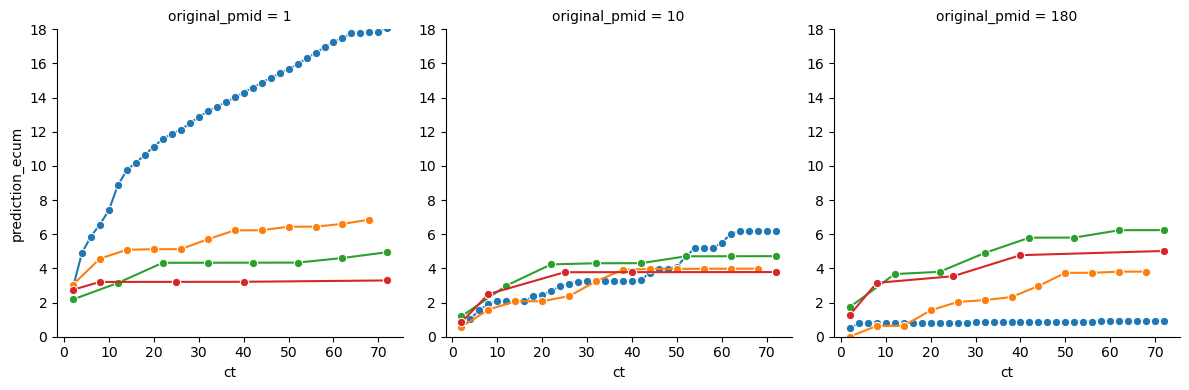

In [120]:
# Rappel de ce que ça donnait avec données réelles 
g = sns.FacetGrid(df_scenarios, col='original_pmid', col_wrap=3, height=4, aspect = 1, sharex=False, sharey=False)
g.map_dataframe(sns.lineplot, x='ct', y='prediction_ecum', hue='seq_time', marker='o', palette='tab10')

for ax in g.axes.flatten():
    ax.set_ylim(0, 18)

plt.tight_layout()
plt.show()

In [159]:
predictions_scenario_with_data_augmentation = pd.read_csv('results/10_2_predictions_on_scenarios_with_data_augmentation/predictions_on_scenarios_rnn_data_augmentation.csv')

In [160]:
predictions_scenario_with_data_augmentation.head (2)

scenario  pmid       strategy  group_temp  group_wind  group_rain  ct  dt  \
0         1     1  Incorporation           1           1           1   2   2   
1         1     1  Incorporation           1           1           1   4   2   

   air.temp  wind.2m  rain.rate  tan.app  app.mthd  app.rate  man.dm  man.ph  \
0      11.2      2.3        0.0     36.7         0      18.7     3.8     7.5   
1      11.2      2.3        0.0     36.7         0      18.7     3.8     7.5   

   man.source  incorp  t.incorp  prediction_ecum  prediction_delta_ecum  
0           0       1         0         1.628788               1.628788  
1           0       1         0         1.662179               0.033391

/tmp/ipykernel_892436/3050377007.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_efficacy)


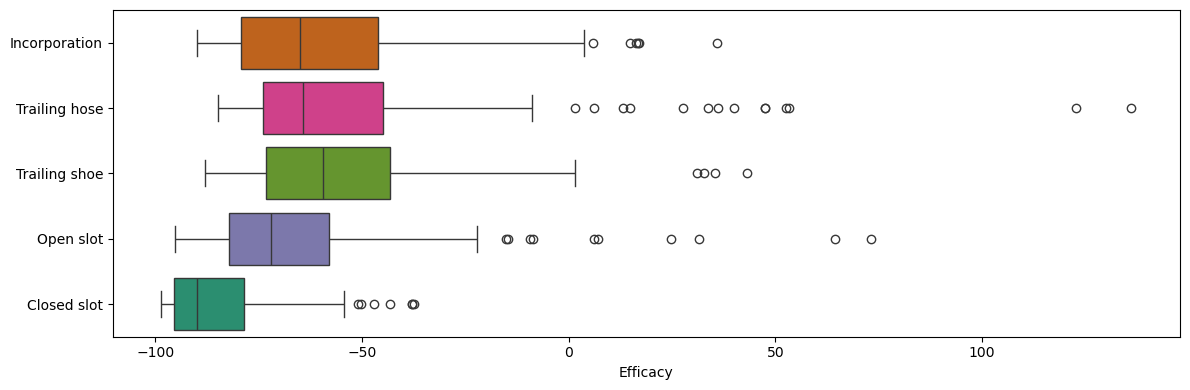

In [161]:
# 1. Filtrer les dernières lignes (max ct) par pmid
df_efficacy_with_interpolation = (
    predictions_scenario_with_data_augmentation
    .sort_values("ct")
    .groupby("pmid")
    .tail(1)
    .copy()
)

# 2. Calcul de l'efficacité par scénario
def compute_efficacy(group):
    broadcast_value = group.loc[group["strategy"] == "Broadcast", "prediction_ecum"]
    if not broadcast_value.empty:
        group["efficacy"] = ((group["prediction_ecum"] / broadcast_value.values[0]) - 1) * 100
    else:
        group["efficacy"] = None
    return group

df_efficacy_with_interpolation = (
    df_efficacy_with_interpolation
    .groupby("scenario", group_keys=False)
    .apply(compute_efficacy)
)

# 3. Filtrer les stratégies différentes de "Broadcast"
df_plot = df_efficacy_with_interpolation[df_efficacy_with_interpolation["strategy"] != "Broadcast"].copy()

# 4. Ordre personnalisé des stratégies
strategy_order = ["Incorporation", "Trailing hose", "Trailing shoe", "Open slot", "Closed slot"]

# 5. Couleurs type Dark2 (palette Seaborn ou matplotlib)
dark2_palette = sns.color_palette("Dark2", n_colors=len(strategy_order))
dark2_palette = [dark2_palette[i] for i in [3, 4, 1, 2, 0]]

# 6. Tracer le boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(
    data=df_plot,
    x="efficacy",
    y="strategy",
    order=strategy_order,
    hue = "strategy",
    legend = False,
    palette=dark2_palette
)

plt.xlabel("Efficacy")
plt.ylabel("")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [159]:
predictions_scenario_with_data_augmentation = pd.read_csv('results/10_2_predictions_on_scenarios_with_data_augmentation/predictions_on_scenarios_rnn_data_augmentation_n_epoch_200.csv')

In [160]:
predictions_scenario_with_data_augmentation.head (2)

scenario  pmid       strategy  group_temp  group_wind  group_rain  ct  dt  \
0         1     1  Incorporation           1           1           1   2   2   
1         1     1  Incorporation           1           1           1   4   2   

   air.temp  wind.2m  rain.rate  tan.app  app.mthd  app.rate  man.dm  man.ph  \
0      11.2      2.3        0.0     36.7         0      18.7     3.8     7.5   
1      11.2      2.3        0.0     36.7         0      18.7     3.8     7.5   

   man.source  incorp  t.incorp  prediction_ecum  prediction_delta_ecum  
0           0       1         0         1.628788               1.628788  
1           0       1         0         1.662179               0.033391

/tmp/ipykernel_892436/3050377007.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_efficacy)


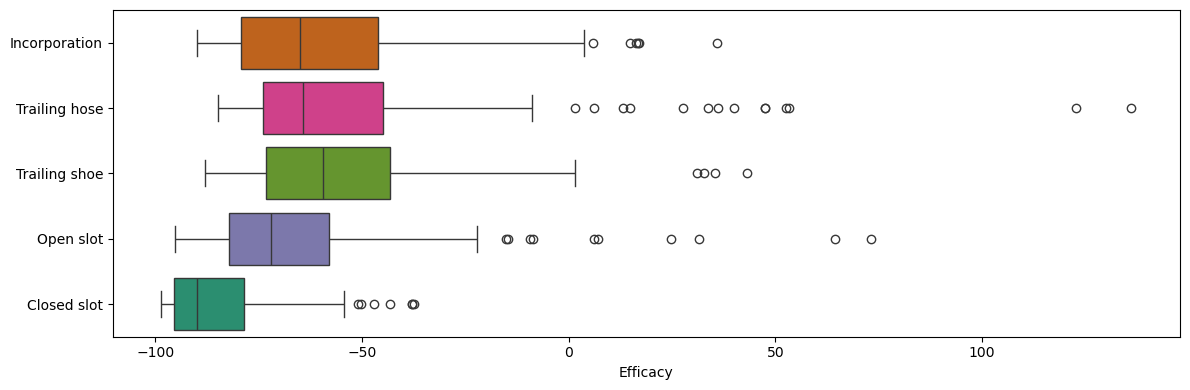

In [161]:
# 1. Filtrer les dernières lignes (max ct) par pmid
df_efficacy_with_interpolation = (
    predictions_scenario_with_data_augmentation
    .sort_values("ct")
    .groupby("pmid")
    .tail(1)
    .copy()
)

# 2. Calcul de l'efficacité par scénario
def compute_efficacy(group):
    broadcast_value = group.loc[group["strategy"] == "Broadcast", "prediction_ecum"]
    if not broadcast_value.empty:
        group["efficacy"] = ((group["prediction_ecum"] / broadcast_value.values[0]) - 1) * 100
    else:
        group["efficacy"] = None
    return group

df_efficacy_with_interpolation = (
    df_efficacy_with_interpolation
    .groupby("scenario", group_keys=False)
    .apply(compute_efficacy)
)

# 3. Filtrer les stratégies différentes de "Broadcast"
df_plot = df_efficacy_with_interpolation[df_efficacy_with_interpolation["strategy"] != "Broadcast"].copy()

# 4. Ordre personnalisé des stratégies
strategy_order = ["Incorporation", "Trailing hose", "Trailing shoe", "Open slot", "Closed slot"]

# 5. Couleurs type Dark2 (palette Seaborn ou matplotlib)
dark2_palette = sns.color_palette("Dark2", n_colors=len(strategy_order))
dark2_palette = [dark2_palette[i] for i in [3, 4, 1, 2, 0]]

# 6. Tracer le boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(
    data=df_plot,
    x="efficacy",
    y="strategy",
    order=strategy_order,
    hue = "strategy",
    legend = False,
    palette=dark2_palette
)

plt.xlabel("Efficacy")
plt.ylabel("")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# End